<a href="https://colab.research.google.com/github/a1906525/Deep-Learning-Fundamentals/blob/main/Predicting_Diabetes_Using_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sai Akshay Suresh
## a1906525@adelaide.edu.au

This work is for the assignment titled "Diabetes Prediction Using Perceptron" in the subject Deep Learning Fundamentals.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading Dataset

In [ ]:
import pandas as pd

# Load dataset from Google Drive
file_path = "/content/drive/MyDrive/Diabetes Prediction using Perceptron/diabetes.csv"
data = pd.read_csv(file_path)

# Continue with the rest of the code
print(data.head())  # Just to check if the file loaded correctly


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


# Experiment 1 - Baseline Perceptron

* The experiment was done and the results were saved as an excel sheet file.  

Dataset loaded successfully.
First five rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Missing values per column after replacing zeros with NaN:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                    

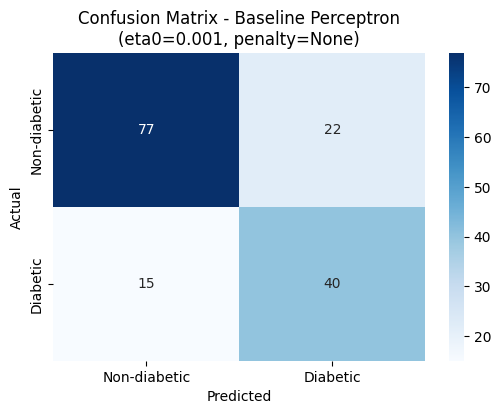


Training Baseline Perceptron with eta0=0.01, penalty=None


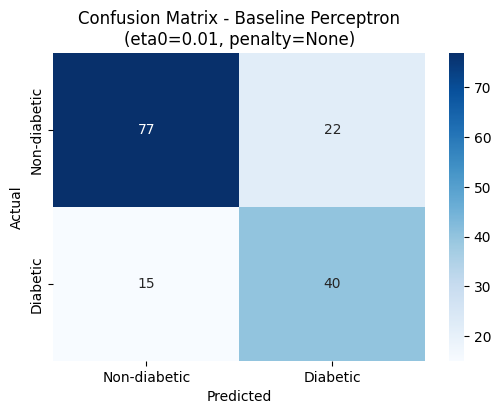


Training Baseline Perceptron with eta0=0.1, penalty=None


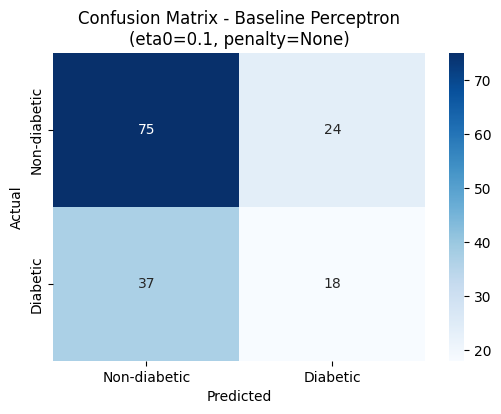


Training Baseline Perceptron with eta0=0.001, penalty=l2


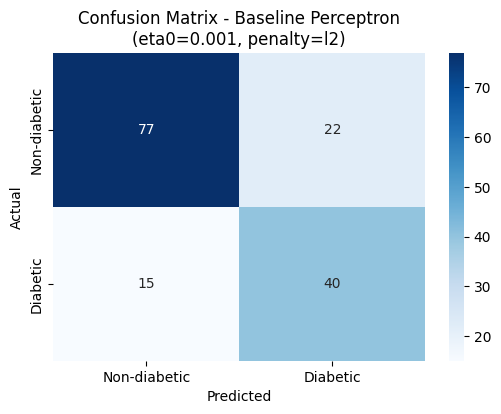


Training Baseline Perceptron with eta0=0.01, penalty=l2


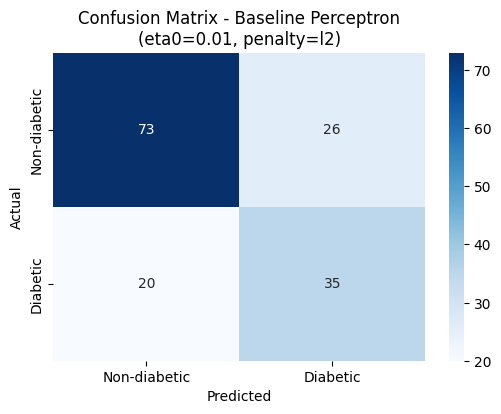


Training Baseline Perceptron with eta0=0.1, penalty=l2


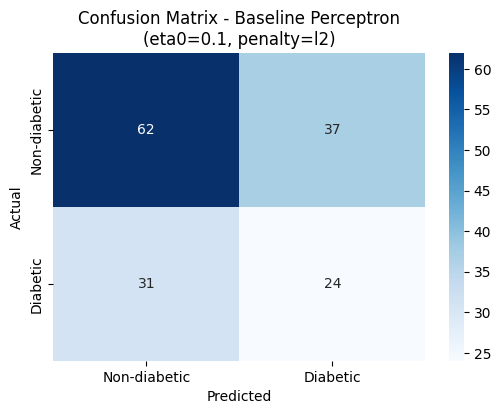


Training Baseline Perceptron with eta0=0.001, penalty=l1


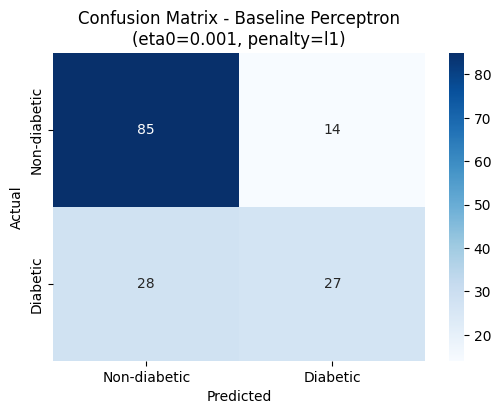


Training Baseline Perceptron with eta0=0.01, penalty=l1


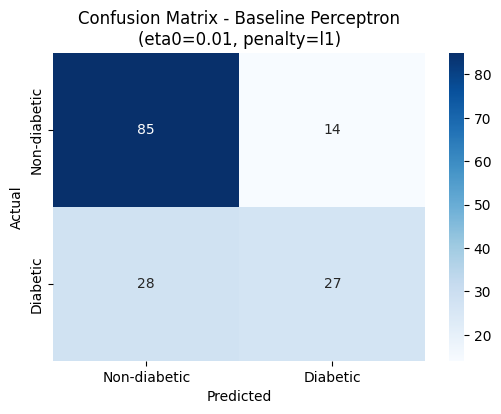


Training Baseline Perceptron with eta0=0.1, penalty=l1


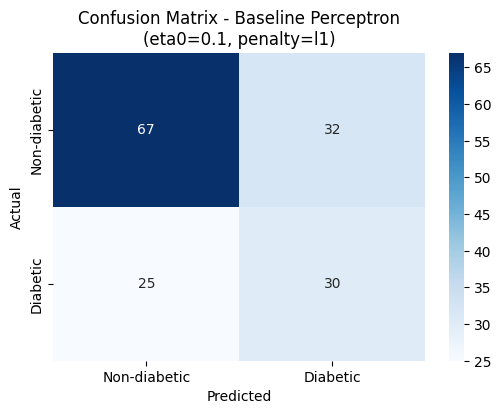


Training Baseline Perceptron with eta0=0.001, penalty=elasticnet


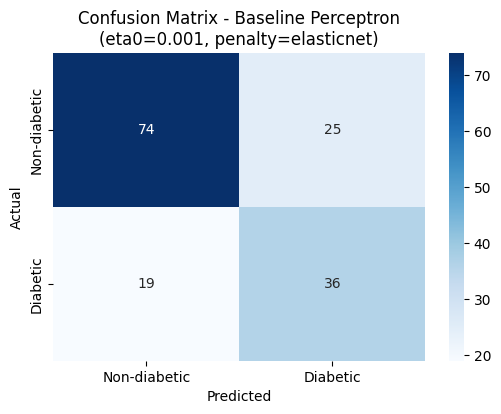


Training Baseline Perceptron with eta0=0.01, penalty=elasticnet


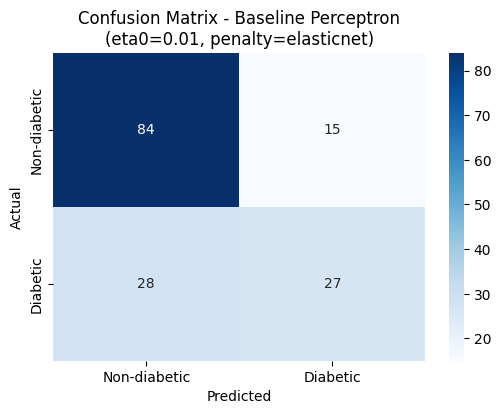


Training Baseline Perceptron with eta0=0.1, penalty=elasticnet


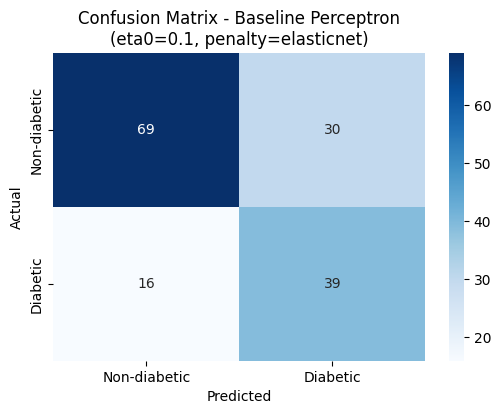


Results saved to Baseline_Perceptron_Results.xlsx
File saved successfully at: /content/Baseline_Perceptron_Results.xlsx
Current Working Directory: /content


In [ ]:
#Experiment 1
#Baseline Perceptron

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from time import time

# Scikit-learn imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss

# Load the dataset
data_path = "/content/drive/MyDrive/Diabetes Prediction using Perceptron/diabetes.csv"
try:
    data = pd.read_csv(data_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"Error: The file '{data_path}' was not found.")
    exit()

# Preview the data
print("First five rows of the dataset:")
print(data.head())

# Check for missing values (replace zeros with NaN in specific columns)
columns_with_missing_values = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[columns_with_missing_values] = data[columns_with_missing_values].replace(0, np.nan)

# Display the number of missing values in each column
print("\nMissing values per column after replacing zeros with NaN:")
print(data.isnull().sum())

# Impute missing values using the median (or mean) for each column
data[columns_with_missing_values] = data[columns_with_missing_values].fillna(data[columns_with_missing_values].median())

# Verify that missing values are filled
print("\nMissing values per column after imputation:")
print(data.isnull().sum())

# Separate features and target variable
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define hyperparameters to tune
learning_rates = [0.001, 0.01, 0.1]
penalties = [None, 'l2', 'l1', 'elasticnet']
max_iter = 2000  # Maximum number of iterations
alpha = 0.0001  # Regularization strength

# Initialize an empty list to store results
results = []

def run_baseline_perceptron():
    model_name = "Baseline Perceptron"
    for penalty in penalties:
        for eta0 in learning_rates:
            print(f"\nTraining {model_name} with eta0={eta0}, penalty={penalty}")

            # Initialize the Perceptron model
            perceptron = Perceptron(max_iter=max_iter, eta0=eta0, penalty=penalty, alpha=alpha, random_state=42)

            # Train the model and measure the time taken
            start_time = time()
            perceptron.fit(X_train_scaled, y_train)
            training_time = time() - start_time

            # Make predictions on the training and testing sets
            y_train_pred = perceptron.predict(X_train_scaled)
            y_test_pred = perceptron.predict(X_test_scaled)

            # Calculate training and testing loss
            train_loss = log_loss(y_train, perceptron.decision_function(X_train_scaled))
            test_loss = log_loss(y_test, perceptron.decision_function(X_test_scaled))

            # Calculate accuracy
            train_accuracy = accuracy_score(y_train, y_train_pred)
            test_accuracy = accuracy_score(y_test, y_test_pred)

            # Compute confusion matrix
            cm = confusion_matrix(y_test, y_test_pred)

            # Extract metrics from confusion matrix
            tn, fp, fn, tp = cm.ravel()
            sensitivity = tp / (tp + fn)  # Recall
            specificity = tn / (tn + fp)
            fpr = fp / (fp + tn)
            fnr = fn / (fn + tp)
            fdr = fp / (fp + tp)

            # Append results
            results.append({
                "Penalty": penalty,
                "Learning Rate": eta0,
                "Model": model_name,
                "Train Accuracy": train_accuracy,
                "Test Accuracy": test_accuracy,
                "Train Loss": train_loss,
                "Test Loss": test_loss,
                "Sensitivity (Recall)": sensitivity,
                "Specificity": specificity,
                "FPR": fpr,
                "FNR": fnr,
                "FDR": fdr,
                "Training Time (s)": training_time
            })

            # Plot the confusion matrix
            plt.figure(figsize=(6, 4))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                        xticklabels=['Non-diabetic', 'Diabetic'],
                        yticklabels=['Non-diabetic', 'Diabetic'])
            plt.xlabel('Predicted')
            plt.ylabel('Actual')
            plt.title(f'Confusion Matrix - {model_name}\n(eta0={eta0}, penalty={penalty})')
            plt.show()

# Run the baseline perceptron model
run_baseline_perceptron()

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Save the results to an Excel file
excel_filename = 'Baseline_Perceptron_Results.xlsx'
results_df.to_excel(excel_filename, index=False)
print(f"\nResults saved to {excel_filename}")

# Check if the file was saved successfully
if os.path.exists(excel_filename):
    print(f"File saved successfully at: {os.path.abspath(excel_filename)}")
else:
    print("Error: File was not saved.")

# Print the current working directory
print("Current Working Directory:", os.getcwd())


# Experiment 2 - Stochastic Perceptron  

Dataset loaded successfully.
First few rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Missing values per column after replacing zeros with NaN:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                     

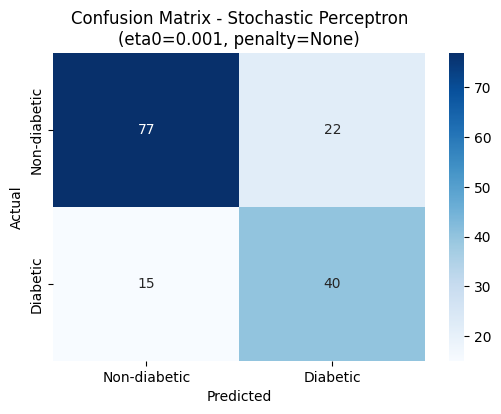


Training Stochastic Perceptron with eta0=0.01, penalty=None


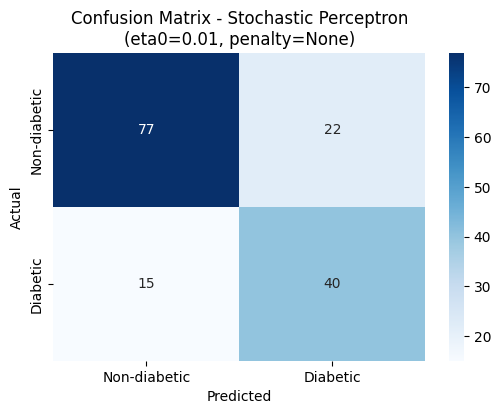


Training Stochastic Perceptron with eta0=0.1, penalty=None


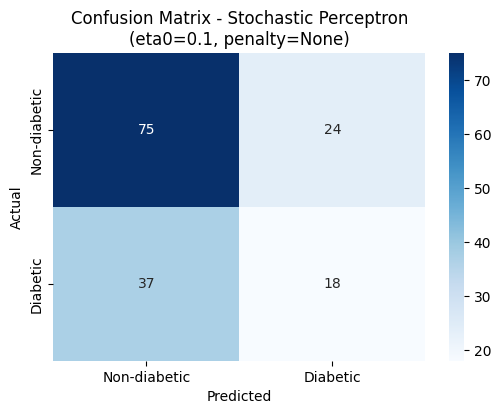


Training Stochastic Perceptron with eta0=0.001, penalty=l2


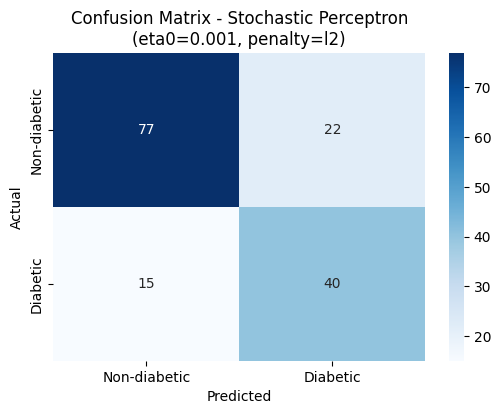


Training Stochastic Perceptron with eta0=0.01, penalty=l2


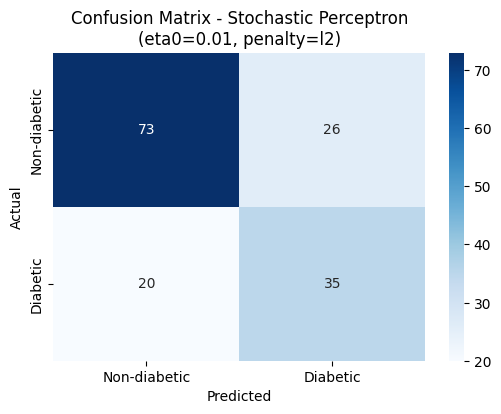


Training Stochastic Perceptron with eta0=0.1, penalty=l2


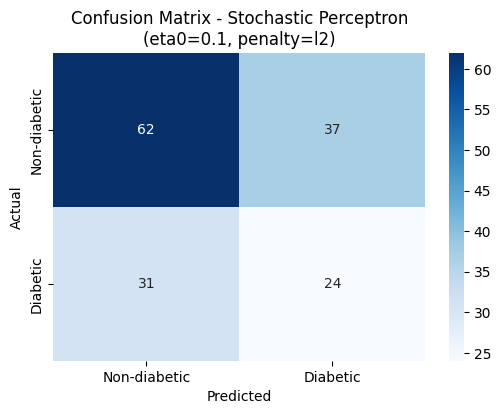


Training Stochastic Perceptron with eta0=0.001, penalty=l1


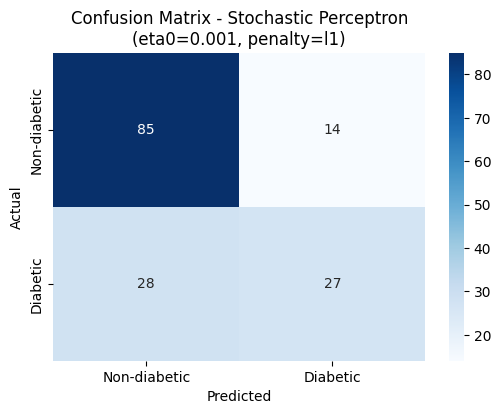


Training Stochastic Perceptron with eta0=0.01, penalty=l1


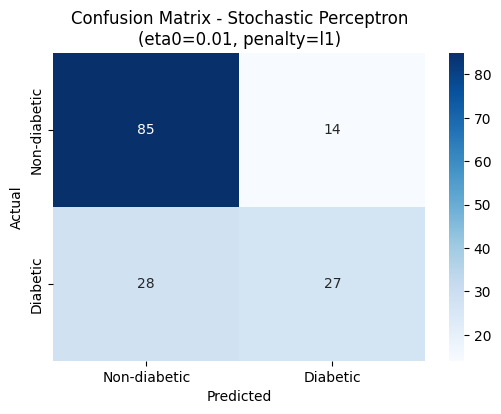


Training Stochastic Perceptron with eta0=0.1, penalty=l1


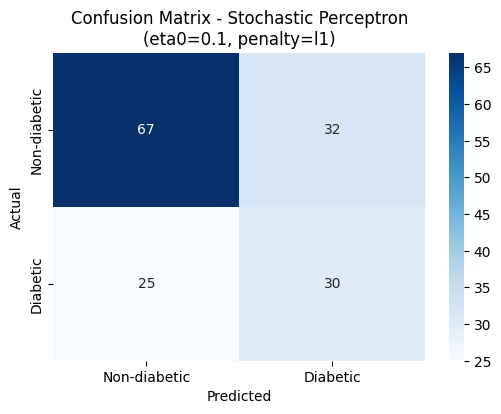


Training Stochastic Perceptron with eta0=0.001, penalty=elasticnet


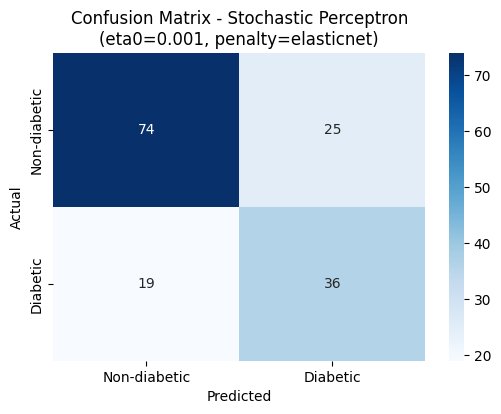


Training Stochastic Perceptron with eta0=0.01, penalty=elasticnet


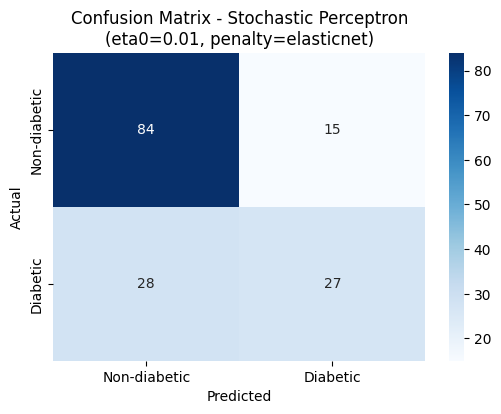


Training Stochastic Perceptron with eta0=0.1, penalty=elasticnet


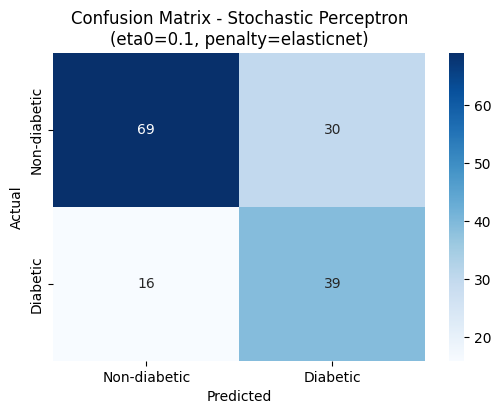


Results saved to Stochastic_Perceptron_Results.xlsx
File saved successfully at: /content/Stochastic_Perceptron_Results.xlsx
Current Working Directory: /content


In [ ]:
# Experiment 2
# Stochastic Perceptron

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from time import time

# Scikit-learn imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss

# Load the dataset
data_path = "/content/drive/MyDrive/Diabetes Prediction using Perceptron/diabetes.csv"
try:
    data = pd.read_csv(data_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"Error: The file '{data_path}' was not found.")
    exit()

# Preview the data
print("First few rows of the dataset:")
print(data.head())

# Check for missing values (replace zeros with NaN in specific columns)
columns_with_missing_values = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[columns_with_missing_values] = data[columns_with_missing_values].replace(0, np.nan)

# Display the number of missing values in each column
print("\nMissing values per column after replacing zeros with NaN:")
print(data.isnull().sum())

# Impute missing values using the median (or mean) for each column
data[columns_with_missing_values] = data[columns_with_missing_values].fillna(data[columns_with_missing_values].median())

# Verify that missing values are filled
print("\nMissing values per column after imputation:")
print(data.isnull().sum())


# Separate features and target variable
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define hyperparameters to experiment with
learning_rates = [0.001, 0.01, 0.1]
penalties = [None, 'l2', 'l1', 'elasticnet']
max_iter = 2000  # Maximum number of iterations
alpha = 0.0001  # Regularization strength

# Initialize a list to store results
results = []

def run_stochastic_perceptron():
    model_name = "Stochastic Perceptron"
    for penalty in penalties:
        for eta0 in learning_rates:
            print(f"\nTraining {model_name} with eta0={eta0}, penalty={penalty}")

            # Initialize the Perceptron model with shuffling enabled
            perceptron = Perceptron(max_iter=max_iter, eta0=eta0, penalty=penalty, alpha=alpha,
                                    shuffle=True, random_state=42)

            # Train the model and record the training time
            start_time = time()
            perceptron.fit(X_train_scaled, y_train)
            training_duration = time() - start_time

            # Make predictions on both training and testing sets
            y_train_pred = perceptron.predict(X_train_scaled)
            y_test_pred = perceptron.predict(X_test_scaled)

            # Calculate log loss for training and testing sets
            train_loss = log_loss(y_train, perceptron.decision_function(X_train_scaled))
            test_loss = log_loss(y_test, perceptron.decision_function(X_test_scaled))

            # Compute accuracy scores
            train_accuracy = accuracy_score(y_train, y_train_pred)
            test_accuracy = accuracy_score(y_test, y_test_pred)

            # Generate confusion matrix
            cm = confusion_matrix(y_test, y_test_pred)

            # Extract metrics from confusion matrix
            tn, fp, fn, tp = cm.ravel()
            sensitivity = tp / (tp + fn)  # True Positive Rate
            specificity = tn / (tn + fp)  # True Negative Rate
            fpr = fp / (fp + tn)          # False Positive Rate
            fnr = fn / (fn + tp)          # False Negative Rate
            fdr = fp / (fp + tp)          # False Discovery Rate

            # Append results to the list
            results.append({
                "Penalty": penalty,
                "Learning Rate": eta0,
                "Model": model_name,
                "Train Accuracy": train_accuracy,
                "Test Accuracy": test_accuracy,
                "Train Loss": train_loss,
                "Test Loss": test_loss,
                "Sensitivity": sensitivity,
                "Specificity": specificity,
                "FPR": fpr,
                "FNR": fnr,
                "FDR": fdr,
                "Training Time (s)": training_duration
            })

            # Plot the confusion matrix
            plt.figure(figsize=(6, 4))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                        xticklabels=['Non-diabetic', 'Diabetic'],
                        yticklabels=['Non-diabetic', 'Diabetic'])
            plt.title(f'Confusion Matrix - {model_name}\n(eta0={eta0}, penalty={penalty})')
            plt.xlabel('Predicted')
            plt.ylabel('Actual')
            plt.show()

# Run the stochastic perceptron experiment
run_stochastic_perceptron()

# Convert results to a DataFrame and save to Excel
results_df = pd.DataFrame(results)
excel_file = 'Stochastic_Perceptron_Results.xlsx'
results_df.to_excel(excel_file, index=False)
print(f"\nResults saved to {excel_file}")

# Verify if the file was saved successfully
if os.path.exists(excel_file):
    print(f"File saved successfully at: {os.path.abspath(excel_file)}")
else:
    print("Error: File not found!")

# Display the current working directory
print("Current Working Directory:", os.getcwd())


# Experiment 3 - Weighted Perceptron
  

Dataset loaded successfully.
First few entries of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Missing values per column after replacing zeros with NaN:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                  

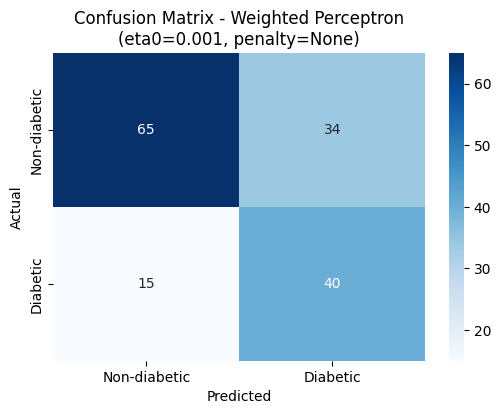


Training Weighted Perceptron with eta0=0.01, penalty=None


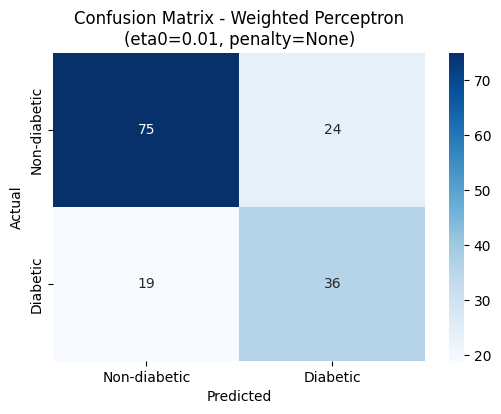


Training Weighted Perceptron with eta0=0.1, penalty=None


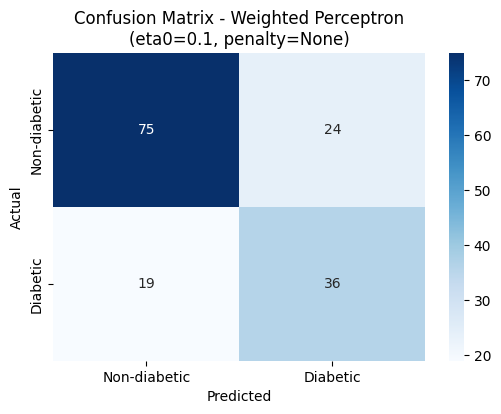


Training Weighted Perceptron with eta0=0.001, penalty=l2


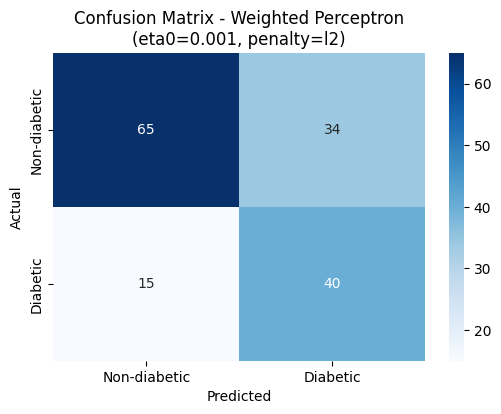


Training Weighted Perceptron with eta0=0.01, penalty=l2


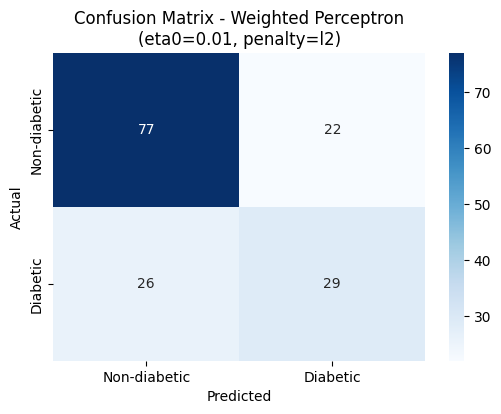


Training Weighted Perceptron with eta0=0.1, penalty=l2


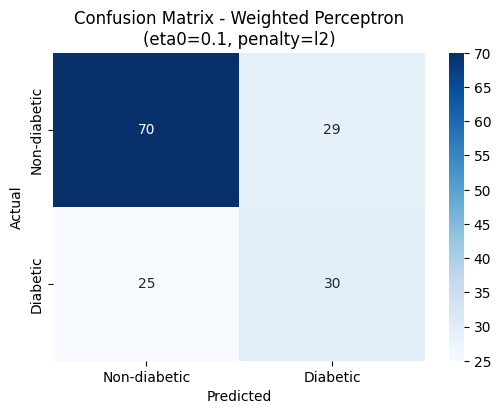


Training Weighted Perceptron with eta0=0.001, penalty=l1


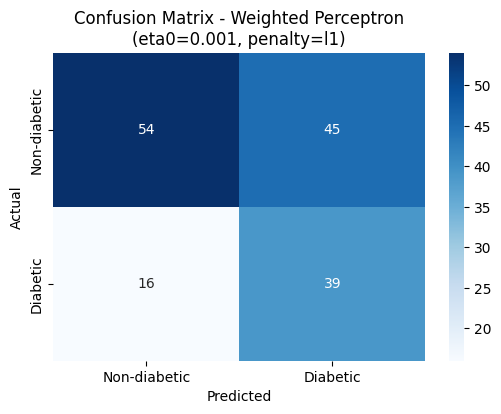


Training Weighted Perceptron with eta0=0.01, penalty=l1


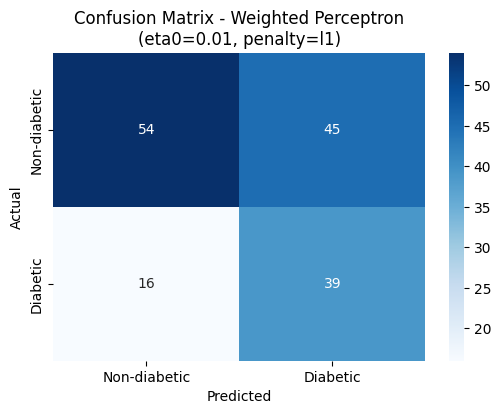


Training Weighted Perceptron with eta0=0.1, penalty=l1


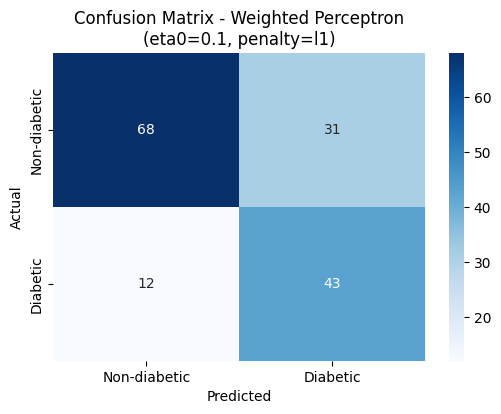


Training Weighted Perceptron with eta0=0.001, penalty=elasticnet


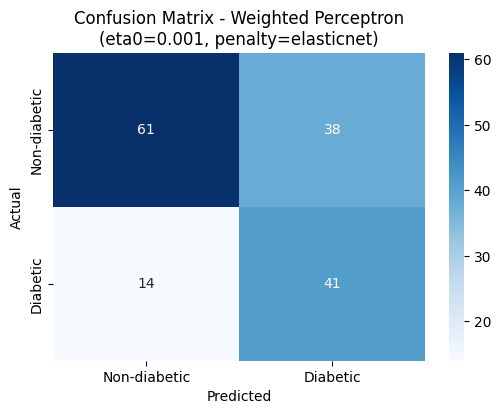


Training Weighted Perceptron with eta0=0.01, penalty=elasticnet


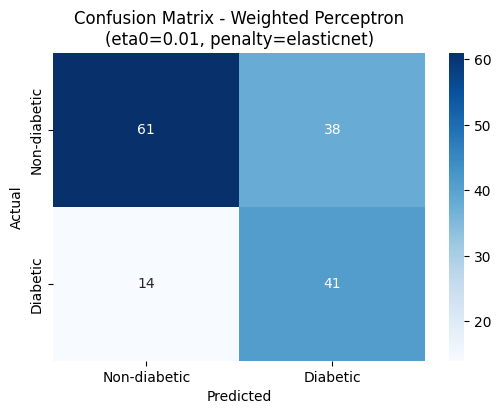


Training Weighted Perceptron with eta0=0.1, penalty=elasticnet


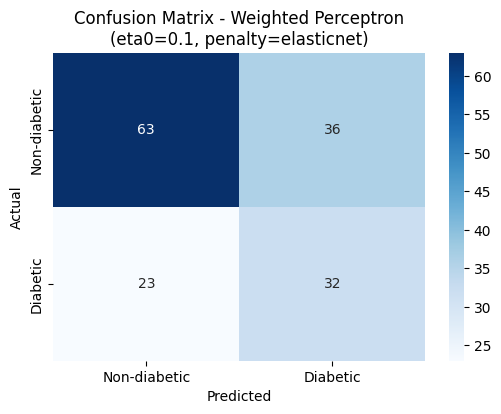


Results saved to Weighted_Perceptron_Results.xlsx
File saved successfully at: /content/Weighted_Perceptron_Results.xlsx
Current Working Directory: /content


In [ ]:
#Experiment 3
#Weighted Perceptron
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from time import time

# Scikit-learn imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss
from sklearn.utils.class_weight import compute_class_weight

# Load the dataset
data_path = "/content/drive/MyDrive/Diabetes Prediction using Perceptron/diabetes.csv"
try:
    data = pd.read_csv(data_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"Error: The file '{data_path}' does not exist.")
    exit()

# Preview the data
print("First few entries of the dataset:")
print(data.head())

# Check for missing values (replace zeros with NaN in specific columns)
columns_with_missing_values = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[columns_with_missing_values] = data[columns_with_missing_values].replace(0, np.nan)

# Display the number of missing values in each column
print("\nMissing values per column after replacing zeros with NaN:")
print(data.isnull().sum())

# Impute missing values using the median (or mean) for each column
data[columns_with_missing_values] = data[columns_with_missing_values].fillna(data[columns_with_missing_values].median())

# Verify that missing values are filled
print("\nMissing values per column after imputation:")
print(data.isnull().sum())

# Separate features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameters for tuning
learning_rates = [0.001, 0.01, 0.1]
penalties = [None, 'l2', 'l1', 'elasticnet']
max_iter = 2000
alpha = 0.0001

# Compute class weights to handle class imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# List to store results
results = []

def run_weighted_perceptron():
    model_name = "Weighted Perceptron"
    for penalty in penalties:
        for eta0 in learning_rates:
            print(f"\nTraining {model_name} with eta0={eta0}, penalty={penalty}")

            # Initialize Perceptron with class weights
            perceptron = Perceptron(max_iter=max_iter, eta0=eta0, penalty=penalty, alpha=alpha,
                                    class_weight=class_weight_dict, random_state=42)

            # Train the model and record time
            start_time = time()
            perceptron.fit(X_train_scaled, y_train)
            training_duration = time() - start_time

            # Predict on training and testing sets
            y_train_pred = perceptron.predict(X_train_scaled)
            y_test_pred = perceptron.predict(X_test_scaled)

            # Calculate log loss
            train_loss = log_loss(y_train, perceptron.decision_function(X_train_scaled))
            test_loss = log_loss(y_test, perceptron.decision_function(X_test_scaled))

            # Accuracy scores
            train_accuracy = accuracy_score(y_train, y_train_pred)
            test_accuracy = accuracy_score(y_test, y_test_pred)

            # Confusion matrix
            cm = confusion_matrix(y_test, y_test_pred)

            # Metrics extraction
            tn, fp, fn, tp = cm.ravel()
            sensitivity = tp / (tp + fn)
            specificity = tn / (tn + fp)
            fpr = fp / (fp + tn)
            fnr = fn / (fn + tp)
            fdr = fp / (fp + tp)

            # Append to results
            results.append({
                "Penalty": penalty,
                "Learning Rate": eta0,
                "Model": model_name,
                "Train Accuracy": train_accuracy,
                "Test Accuracy": test_accuracy,
                "Train Loss": train_loss,
                "Test Loss": test_loss,
                "Sensitivity": sensitivity,
                "Specificity": specificity,
                "FPR": fpr,
                "FNR": fnr,
                "FDR": fdr,
                "Training Time (s)": training_duration
            })

            # Plot confusion matrix
            plt.figure(figsize=(6, 4))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                        xticklabels=['Non-diabetic', 'Diabetic'],
                        yticklabels=['Non-diabetic', 'Diabetic'])
            plt.title(f'Confusion Matrix - {model_name}\n(eta0={eta0}, penalty={penalty})')
            plt.xlabel('Predicted')
            plt.ylabel('Actual')
            plt.show()

# Execute the weighted perceptron experiment
run_weighted_perceptron()

# Save results to Excel
results_df = pd.DataFrame(results)
excel_file = 'Weighted_Perceptron_Results.xlsx'
results_df.to_excel(excel_file, index=False)
print(f"\nResults saved to {excel_file}")

# Check if the file exists
if os.path.exists(excel_file):
    print(f"File saved successfully at: {os.path.abspath(excel_file)}")
else:
    print("Error: File not found!")

# Display current directory
print("Current Working Directory:", os.getcwd())


# Experiment 4 - Perceptron with Synthetic Minority Oversampling Technique (SMOTE)
  

Dataset loaded successfully.
Sample data entries:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Missing values per column after replacing zeros with NaN:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
Di

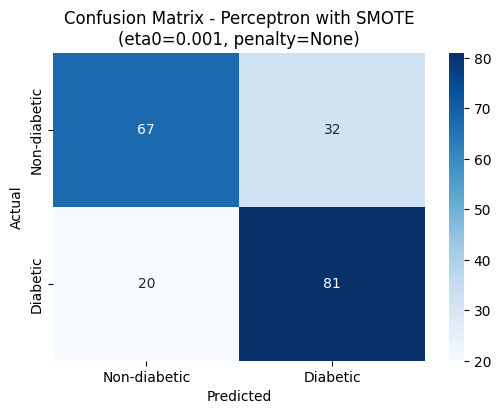


Training Perceptron with SMOTE with eta0=0.01, penalty=None


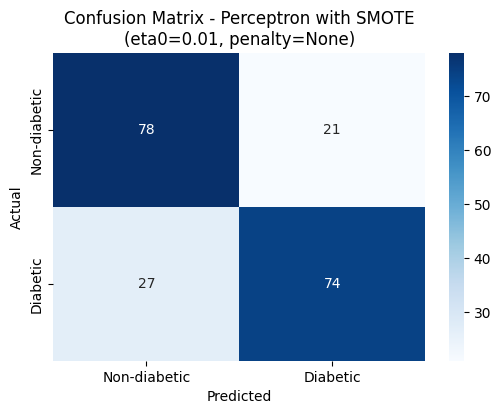


Training Perceptron with SMOTE with eta0=0.1, penalty=None


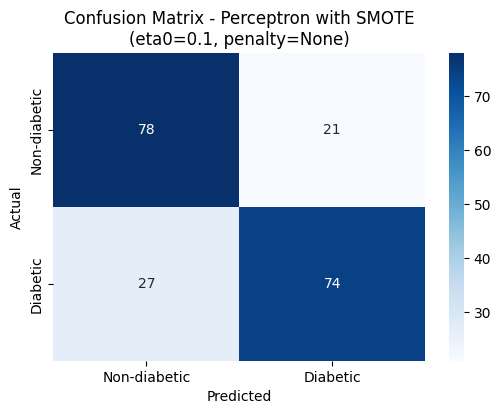


Training Perceptron with SMOTE with eta0=0.001, penalty=l2


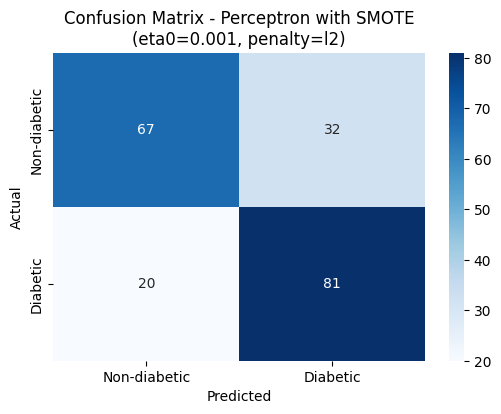


Training Perceptron with SMOTE with eta0=0.01, penalty=l2


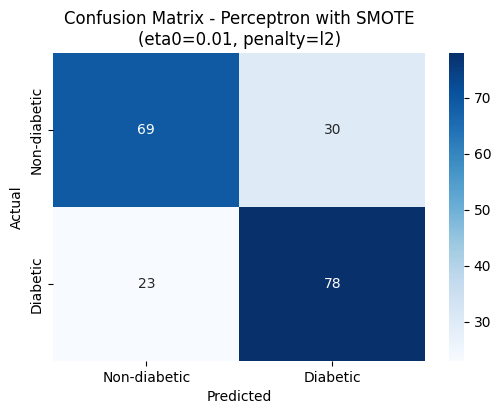


Training Perceptron with SMOTE with eta0=0.1, penalty=l2


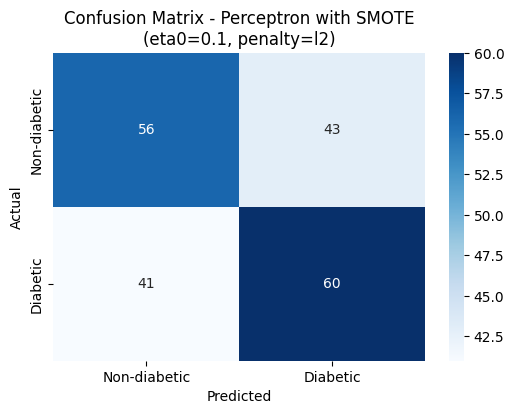


Training Perceptron with SMOTE with eta0=0.001, penalty=l1


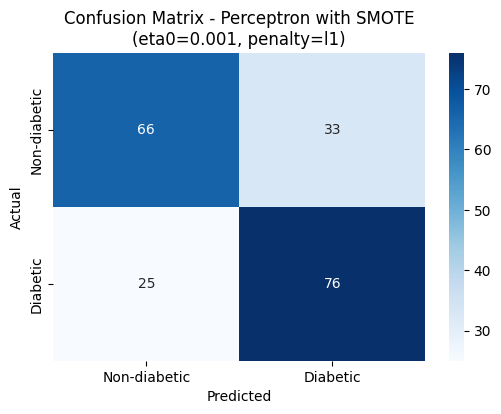


Training Perceptron with SMOTE with eta0=0.01, penalty=l1


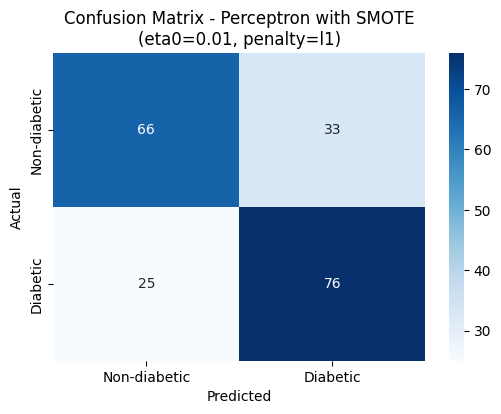


Training Perceptron with SMOTE with eta0=0.1, penalty=l1


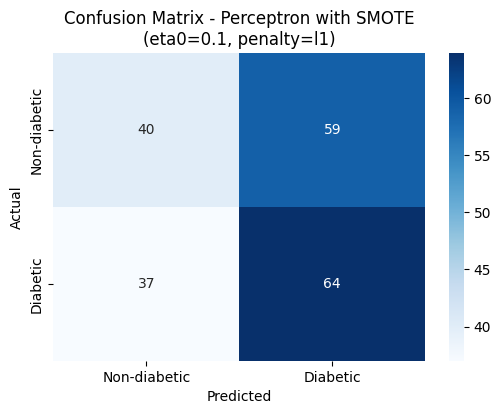


Training Perceptron with SMOTE with eta0=0.001, penalty=elasticnet


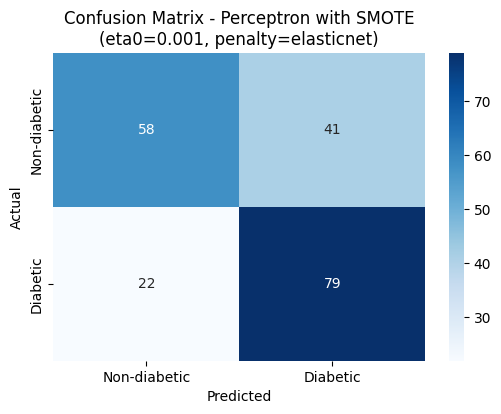


Training Perceptron with SMOTE with eta0=0.01, penalty=elasticnet


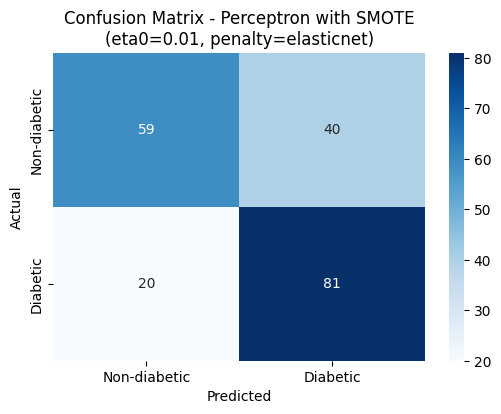


Training Perceptron with SMOTE with eta0=0.1, penalty=elasticnet


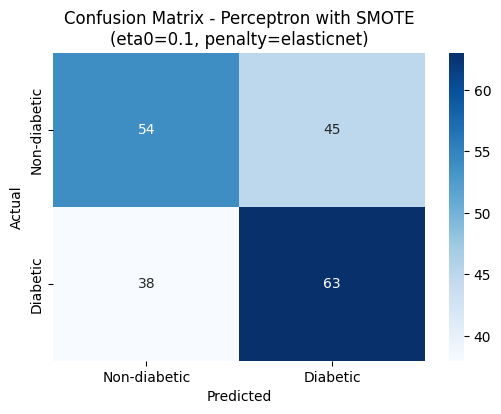


Results saved to Perceptron_with_SMOTE_Results.xlsx
File saved successfully at: /content/Perceptron_with_SMOTE_Results.xlsx
Current Working Directory: /content


In [ ]:
# Experiment 4
# Perceptron with SMOTE

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from time import time

# Scikit-learn and imbalanced-learn imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss
from imblearn.over_sampling import SMOTE

# Load the dataset
data_path = "/content/drive/MyDrive/Diabetes Prediction using Perceptron/diabetes.csv"
try:
    data = pd.read_csv(data_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"Error: Cannot find the file '{data_path}'.")
    exit()

# Preview data
print("Sample data entries:")
print(data.head())

# Check for missing values (replace zeros with NaN in specific columns)
columns_with_missing_values = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[columns_with_missing_values] = data[columns_with_missing_values].replace(0, np.nan)

# Display the number of missing values in each column
print("\nMissing values per column after replacing zeros with NaN:")
print(data.isnull().sum())

# Impute missing values using the median (or mean) for each column
data[columns_with_missing_values] = data[columns_with_missing_values].fillna(data[columns_with_missing_values].median())

# Verify that missing values are filled
print("\nMissing values per column after imputation:")
print(data.isnull().sum())

# Separate inputs and outputs
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print("\nAfter applying SMOTE:")
print(f"Class distribution: {np.bincount(y_resampled)}")

# Split the resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameters
learning_rates = [0.001, 0.01, 0.1]
penalties = [None, 'l2', 'l1', 'elasticnet']
max_iter = 2000
alpha = 0.0001

# Results list
results = []

def run_perceptron_with_smote():
    model_name = "Perceptron with SMOTE"
    for penalty in penalties:
        for eta0 in learning_rates:
            print(f"\nTraining {model_name} with eta0={eta0}, penalty={penalty}")

            # Initialize the Perceptron model
            perceptron = Perceptron(max_iter=max_iter, eta0=eta0, penalty=penalty, alpha=alpha, random_state=42)

            # Train and time the model
            start_time = time()
            perceptron.fit(X_train_scaled, y_train)
            training_duration = time() - start_time

            # Predictions
            y_train_pred = perceptron.predict(X_train_scaled)
            y_test_pred = perceptron.predict(X_test_scaled)

            # Log loss calculations
            train_loss = log_loss(y_train, perceptron.decision_function(X_train_scaled))
            test_loss = log_loss(y_test, perceptron.decision_function(X_test_scaled))

            # Accuracy
            train_accuracy = accuracy_score(y_train, y_train_pred)
            test_accuracy = accuracy_score(y_test, y_test_pred)

            # Confusion matrix
            cm = confusion_matrix(y_test, y_test_pred)

            # Metrics
            tn, fp, fn, tp = cm.ravel()
            sensitivity = tp / (tp + fn)
            specificity = tn / (tn + fp)
            fpr = fp / (fp + tn)
            fnr = fn / (fn + tp)
            fdr = fp / (fp + tp)

            # Append results
            results.append({
                "Penalty": penalty,
                "Learning Rate": eta0,
                "Model": model_name,
                "Train Accuracy": train_accuracy,
                "Test Accuracy": test_accuracy,
                "Train Loss": train_loss,
                "Test Loss": test_loss,
                "Sensitivity": sensitivity,
                "Specificity": specificity,
                "FPR": fpr,
                "FNR": fnr,
                "FDR": fdr,
                "Training Time (s)": training_duration
            })

            # Plotting
            plt.figure(figsize=(6, 4))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                        xticklabels=['Non-diabetic', 'Diabetic'],
                        yticklabels=['Non-diabetic', 'Diabetic'])
            plt.title(f'Confusion Matrix - {model_name}\n(eta0={eta0}, penalty={penalty})')
            plt.xlabel('Predicted')
            plt.ylabel('Actual')
            plt.show()

# Run the experiment
run_perceptron_with_smote()

# Save to Excel
results_df = pd.DataFrame(results)
excel_file = 'Perceptron_with_SMOTE_Results.xlsx'
results_df.to_excel(excel_file, index=False)
print(f"\nResults saved to {excel_file}")

# Verify file existence
if os.path.exists(excel_file):
    print(f"File saved successfully at: {os.path.abspath(excel_file)}")
else:
    print("Error: File not found!")

# Show current directory
print("Current Working Directory:", os.getcwd())


# Experiment 5 - Multilayer Perceptron
  

Dataset loaded successfully.
Dataset snapshot:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Missing values per column after replacing zeros with NaN:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
Diabe

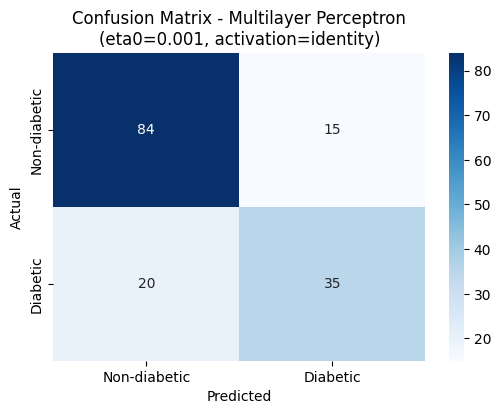


Training Multilayer Perceptron with eta0=0.001, activation=logistic


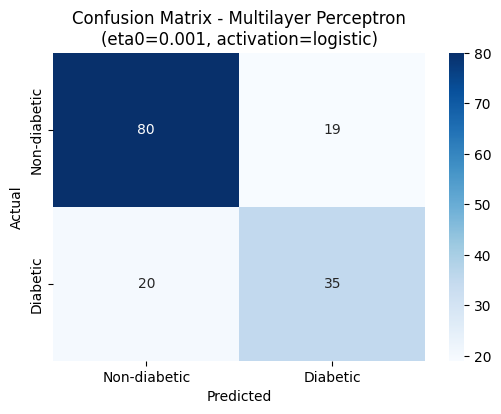


Training Multilayer Perceptron with eta0=0.001, activation=tanh


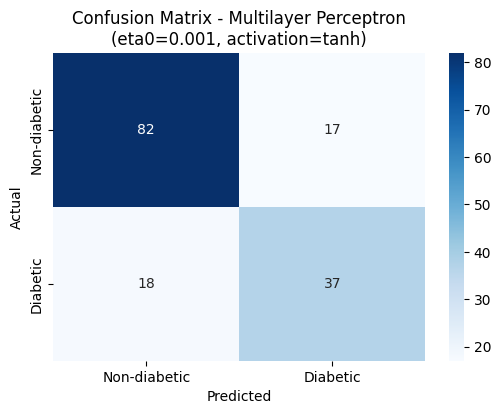


Training Multilayer Perceptron with eta0=0.001, activation=relu


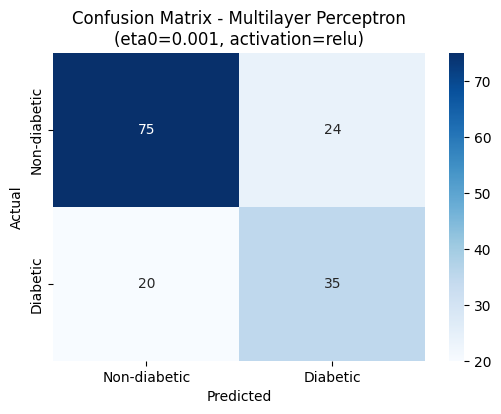


Training Multilayer Perceptron with eta0=0.01, activation=identity


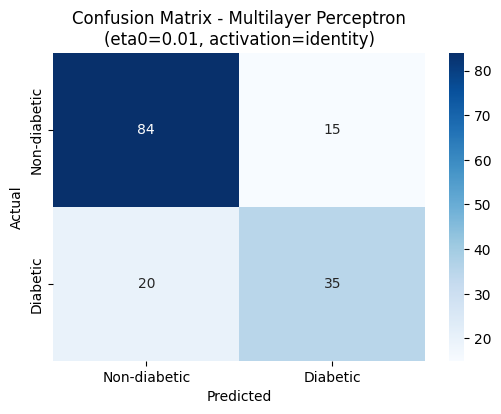


Training Multilayer Perceptron with eta0=0.01, activation=logistic


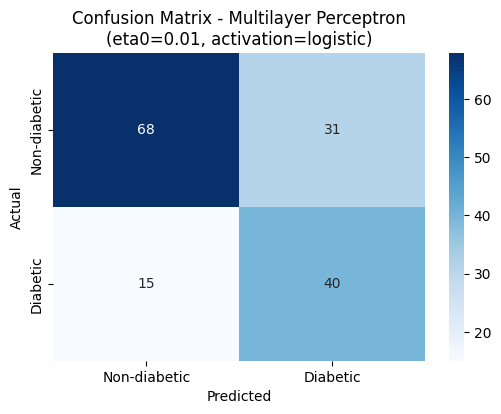


Training Multilayer Perceptron with eta0=0.01, activation=tanh


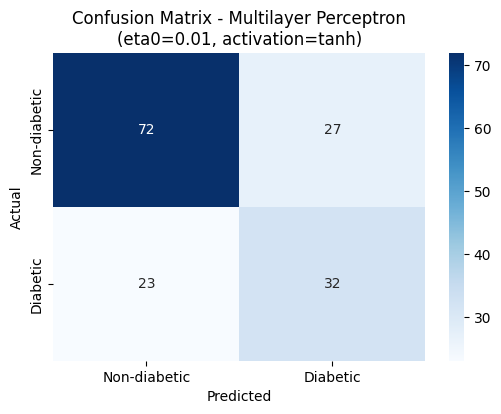


Training Multilayer Perceptron with eta0=0.01, activation=relu


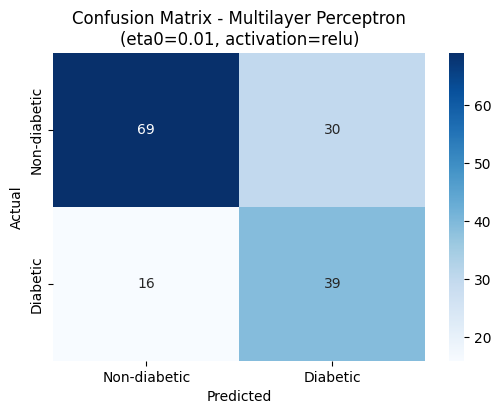


Training Multilayer Perceptron with eta0=0.1, activation=identity


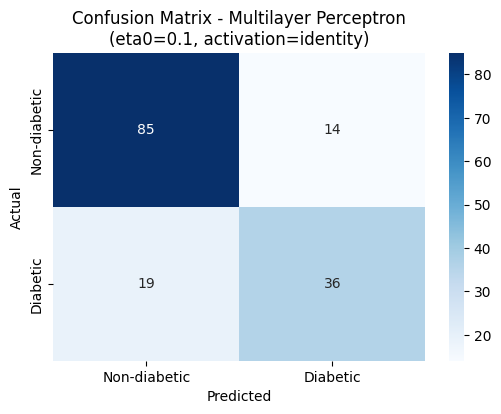


Training Multilayer Perceptron with eta0=0.1, activation=logistic


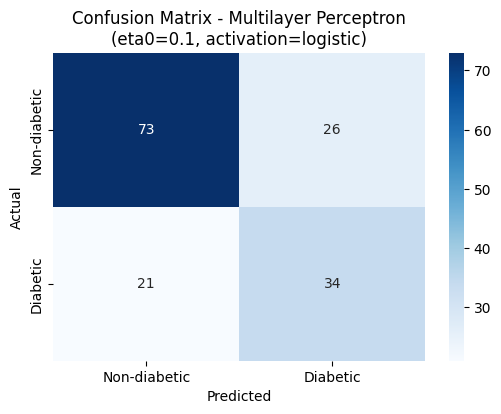


Training Multilayer Perceptron with eta0=0.1, activation=tanh


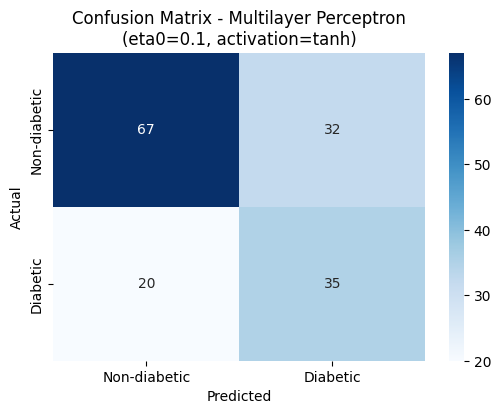


Training Multilayer Perceptron with eta0=0.1, activation=relu


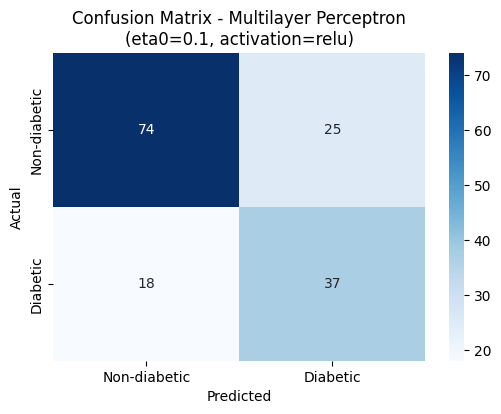


Results saved to MLP_Varying_Activations_Results.xlsx
File saved successfully at: /content/MLP_Varying_Activations_Results.xlsx
Current Working Directory: /content


In [ ]:
# Experiment 5
# Multilayer Perceptron

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from time import time

# Scikit-learn imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss

# Load the dataset
data_path = "/content/drive/MyDrive/Diabetes Prediction using Perceptron/diabetes.csv"
try:
    data = pd.read_csv(data_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"Error: '{data_path}' not found.")
    exit()

# Display data
print("Dataset snapshot:")
print(data.head())

# Check for missing values (replace zeros with NaN in specific columns)
columns_with_missing_values = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[columns_with_missing_values] = data[columns_with_missing_values].replace(0, np.nan)

# Display the number of missing values in each column
print("\nMissing values per column after replacing zeros with NaN:")
print(data.isnull().sum())

# Impute missing values using the median (or mean) for each column
data[columns_with_missing_values] = data[columns_with_missing_values].fillna(data[columns_with_missing_values].median())

# Verify that missing values are filled
print("\nMissing values per column after imputation:")
print(data.isnull().sum())

# Feature and target separation
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameters
learning_rates = [0.001, 0.01, 0.1]
activation_functions = ['identity', 'logistic', 'tanh', 'relu']
max_iter = 2000
alpha = 0.0001

# Results storage
results = []

def run_mlp_varying_activation():
    model_name = "Multilayer Perceptron"
    for eta0 in learning_rates:
        for activation in activation_functions:
            print(f"\nTraining {model_name} with eta0={eta0}, activation={activation}")

            # Initialize MLPClassifier
            mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=max_iter, learning_rate_init=eta0,
                                activation=activation, alpha=alpha, solver='adam', random_state=42)

            # Train and time the model
            start_time = time()
            mlp.fit(X_train_scaled, y_train)
            training_duration = time() - start_time

            # Predictions
            y_train_pred = mlp.predict(X_train_scaled)
            y_test_pred = mlp.predict(X_test_scaled)

            # Probabilities for log loss
            y_train_prob = mlp.predict_proba(X_train_scaled)
            y_test_prob = mlp.predict_proba(X_test_scaled)
            train_loss = log_loss(y_train, y_train_prob)
            test_loss = log_loss(y_test, y_test_prob)

            # Accuracy
            train_accuracy = accuracy_score(y_train, y_train_pred)
            test_accuracy = accuracy_score(y_test, y_test_pred)

            # Confusion matrix
            cm = confusion_matrix(y_test, y_test_pred)

            # Metrics extraction
            tn, fp, fn, tp = cm.ravel()
            sensitivity = tp / (tp + fn)
            specificity = tn / (tn + fp)
            fpr = fp / (fp + tn)
            fnr = fn / (fn + tp)
            fdr = fp / (fp + tp)

            # Append results
            results.append({
                "Activation Function": activation,
                "Learning Rate": eta0,
                "Model": model_name,
                "Train Accuracy": train_accuracy,
                "Test Accuracy": test_accuracy,
                "Train Loss": train_loss,
                "Test Loss": test_loss,
                "Sensitivity": sensitivity,
                "Specificity": specificity,
                "FPR": fpr,
                "FNR": fnr,
                "FDR": fdr,
                "Training Time (s)": training_duration
            })

            # Plot confusion matrix
            plt.figure(figsize=(6, 4))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                        xticklabels=['Non-diabetic', 'Diabetic'],
                        yticklabels=['Non-diabetic', 'Diabetic'])
            plt.title(f'Confusion Matrix - {model_name}\n(eta0={eta0}, activation={activation})')
            plt.xlabel('Predicted')
            plt.ylabel('Actual')
            plt.show()

# Execute the MLP experiment
run_mlp_varying_activation()

# Save results
results_df = pd.DataFrame(results)
excel_file = 'MLP_Varying_Activations_Results.xlsx'
results_df.to_excel(excel_file, index=False)
print(f"\nResults saved to {excel_file}")

# Check file save
if os.path.exists(excel_file):
    print(f"File saved successfully at: {os.path.abspath(excel_file)}")
else:
    print("Error: File not found!")

# Current directory
print("Current Working Directory:", os.getcwd())


## Line Graphs - Baseline Perceptron

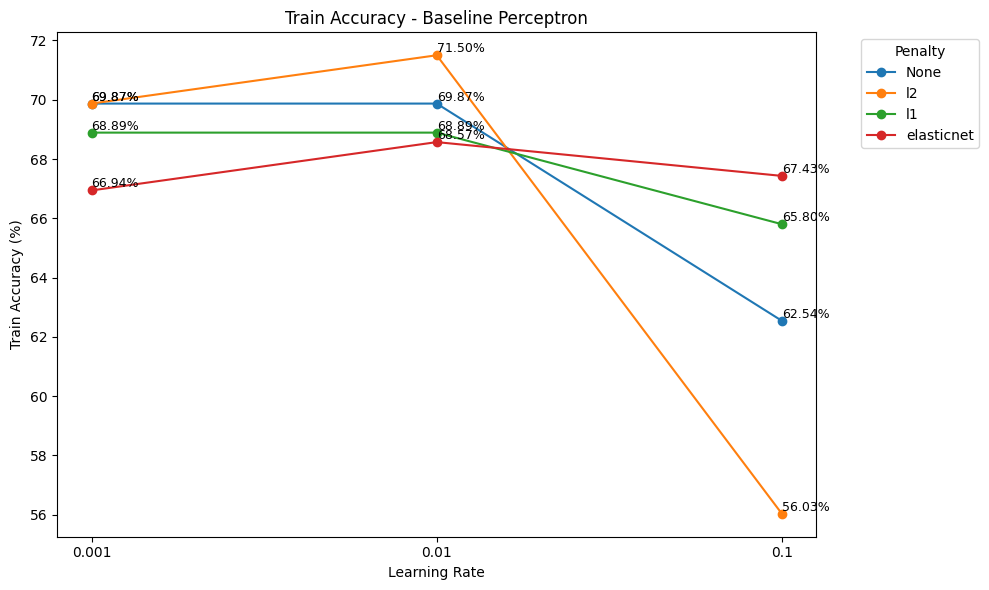

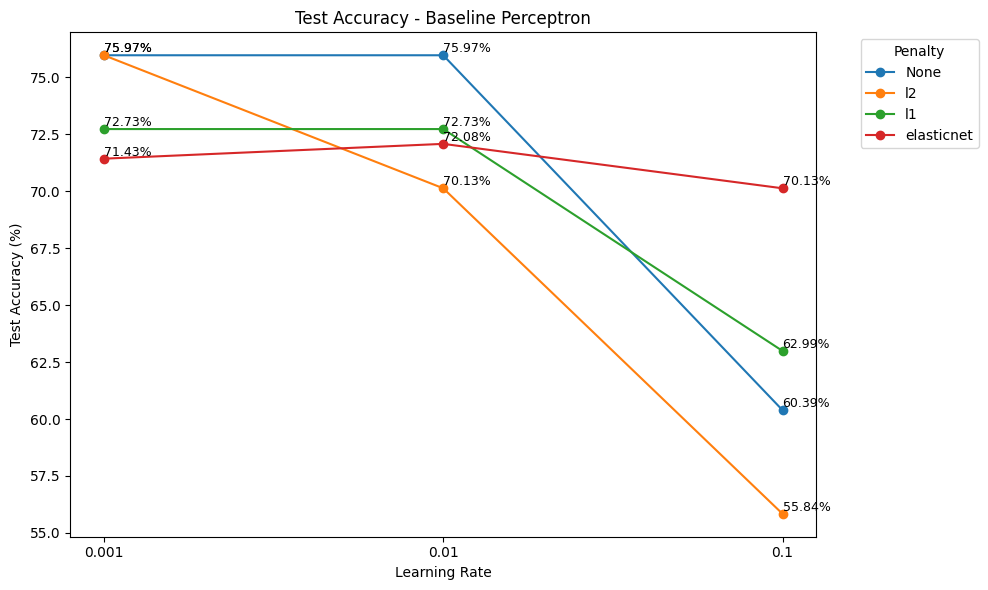

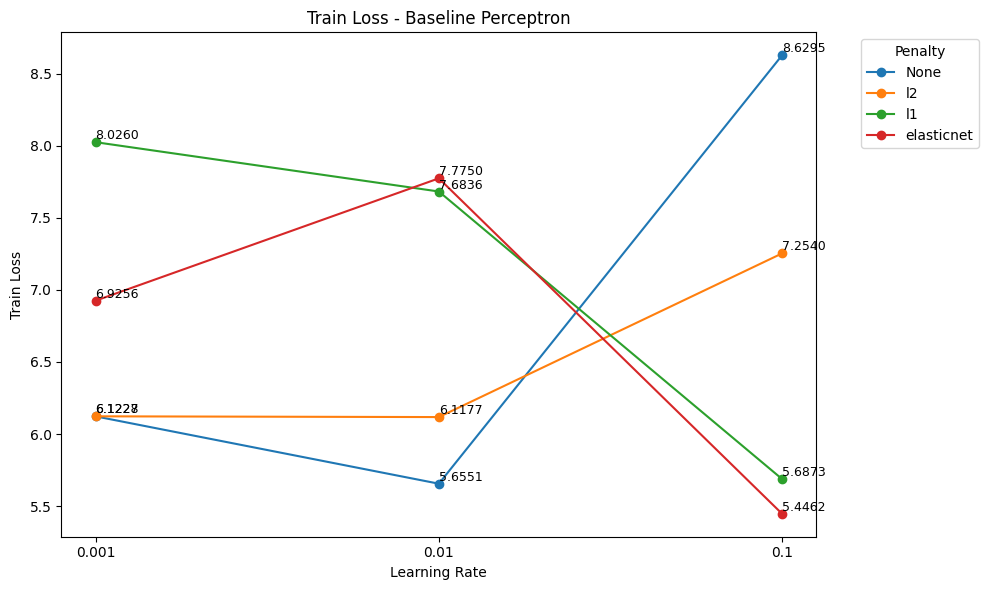

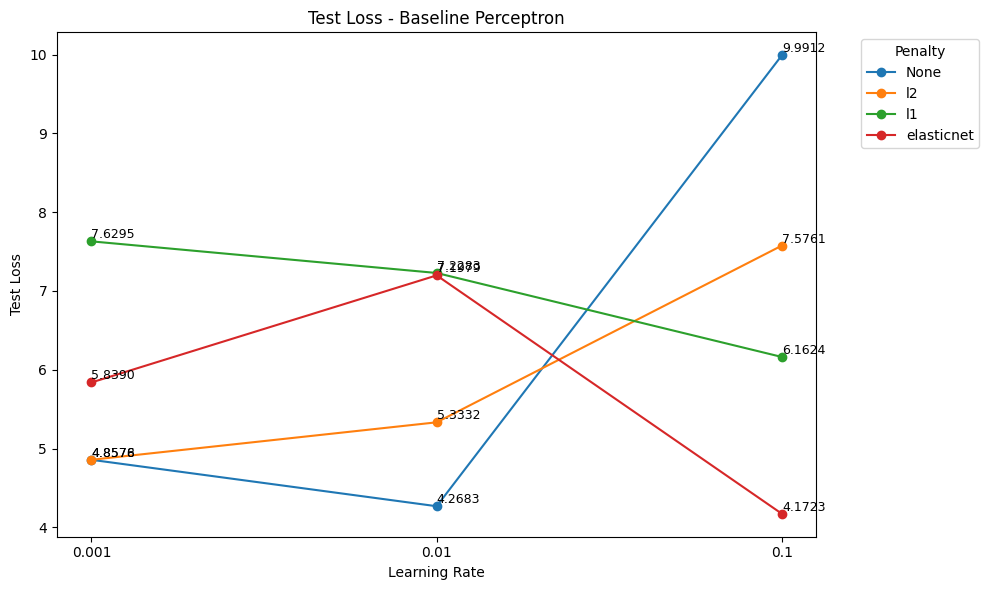

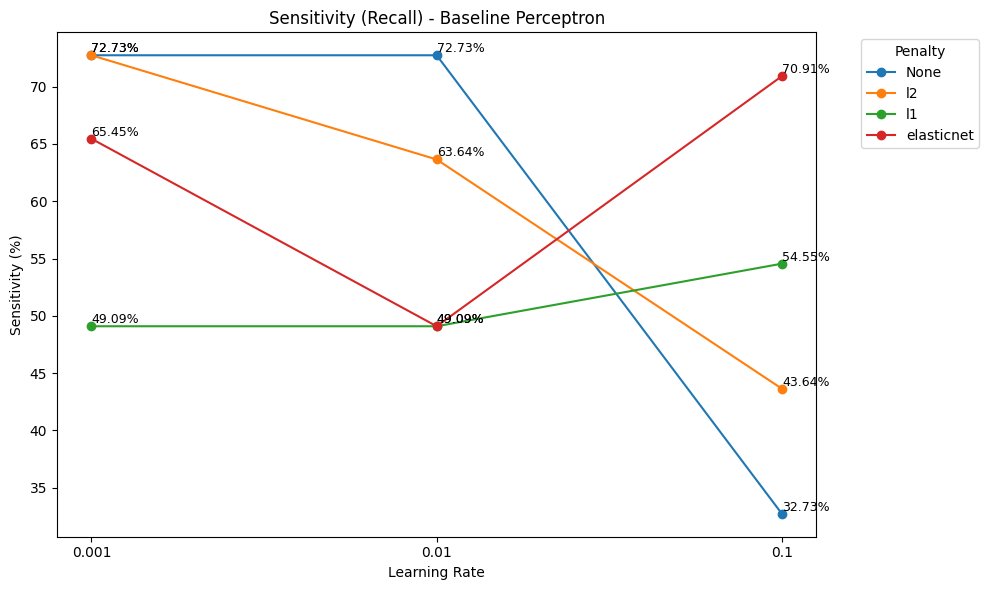

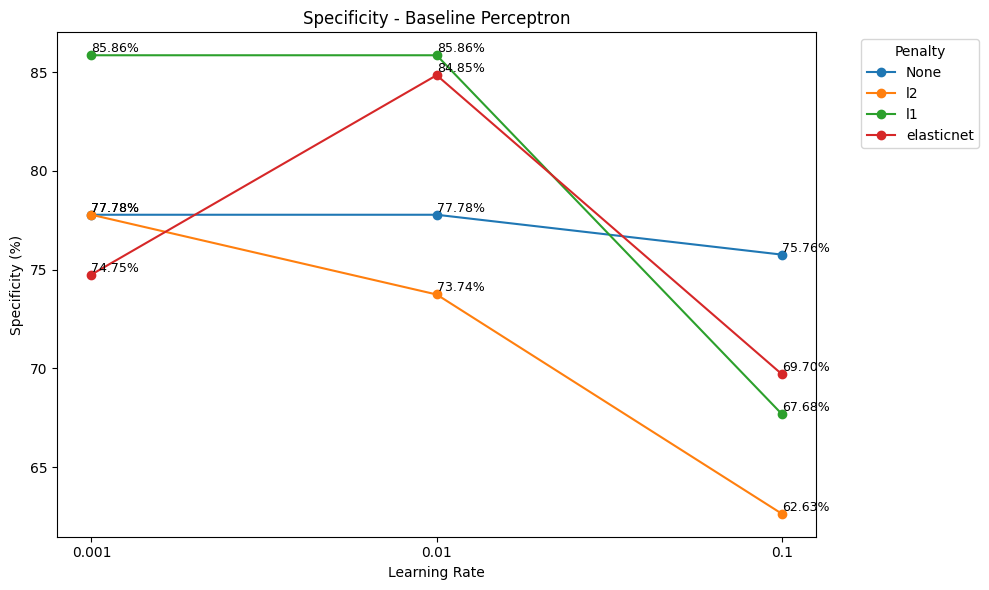

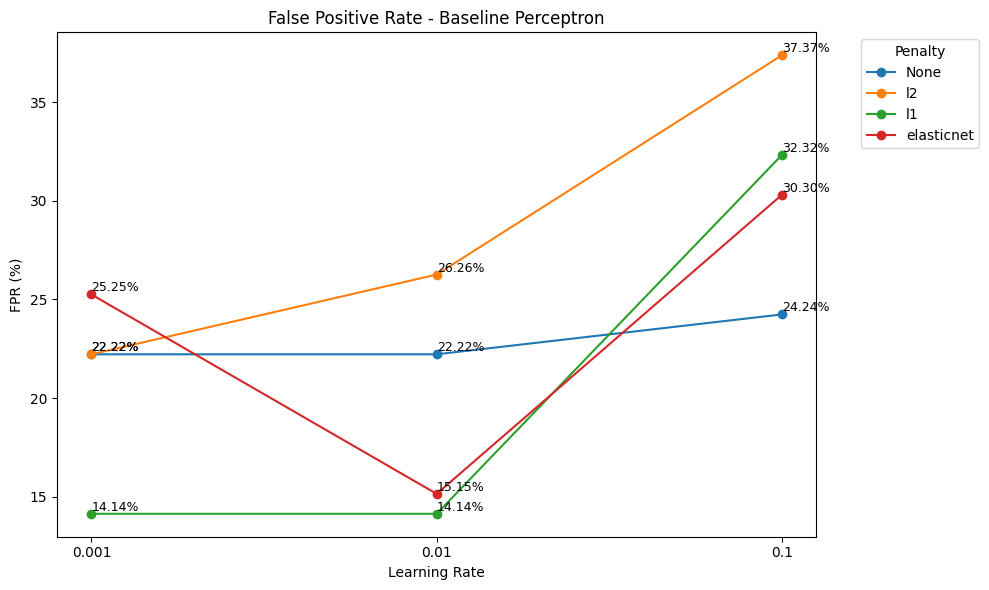

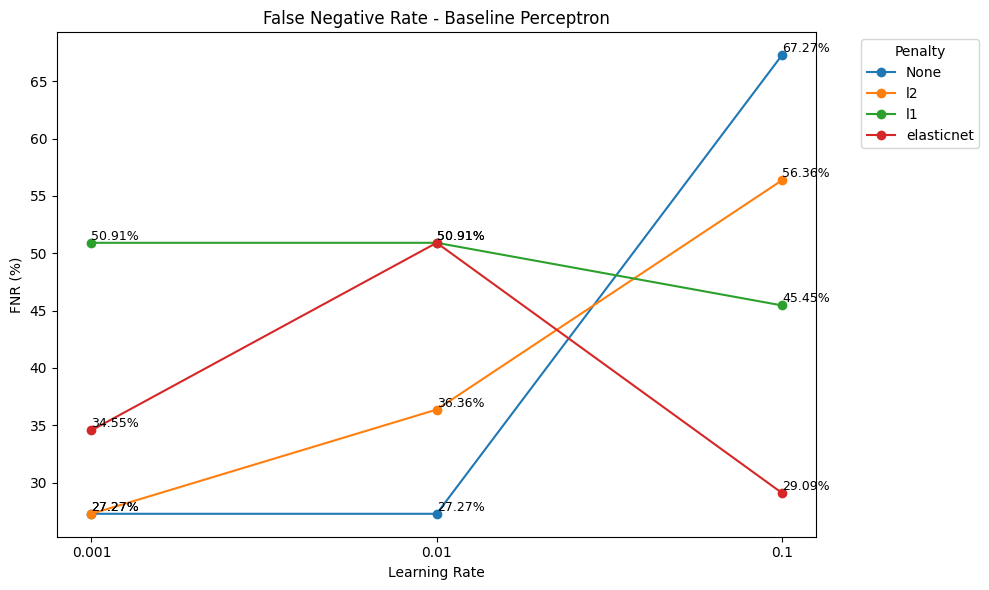

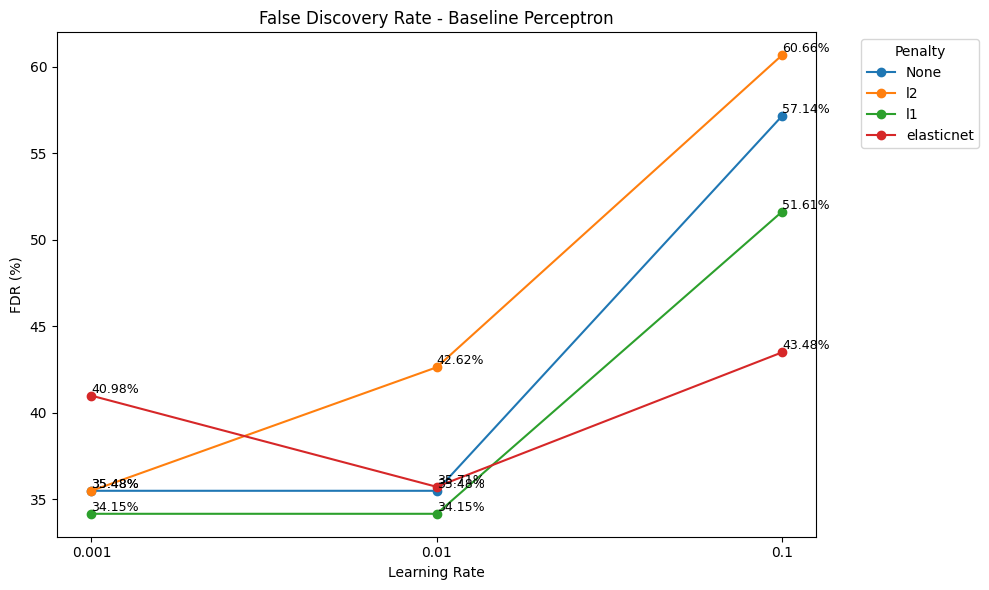

In [7]:
#Exp 1 - Baseline Perceptron
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Function to plot line graphs for different metrics
def plot_metric_graph(metric_data, title, y_label, is_percentage=False):
    plt.figure(figsize=(10, 6))
    unique_penalties = set(penalties)

    for penalty in unique_penalties:
        # Get indices where the penalty matches
        indices = [i for i, p in enumerate(penalties) if p == penalty]
        # Extract corresponding learning rates and metric data
        lr = [learning_rates[i] for i in indices]
        data = [metric_data[i] for i in indices]

        # Plot the data with markers
        plt.plot(lr, data, marker='o', label=penalty)

        # Annotate each data point with its value
        for idx, x in enumerate(lr):
            y = data[idx]
            value = f'{y:.2f}%' if is_percentage else f'{y:.4f}'
            plt.text(x, y, value, verticalalignment='bottom', fontsize=9, color='black')

    # Set plot title and labels
    plt.title(f"{title} - {model_name}")
    plt.xlabel('Learning Rate')
    plt.ylabel(y_label)
    plt.legend(title='Penalty', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Data for Baseline Perceptron
learning_rates = ['0.001', '0.01', '0.1'] * 4  # Repeat each learning rate for each penalty type
penalties = ['None'] * 3 + ['l2'] * 3 + ['l1'] * 3 + ['elasticnet'] * 3  # Corresponding penalties

# Metrics collected from experiments
train_accuracy = [69.87, 69.87, 62.54, 69.87, 71.50, 56.03, 68.89, 68.89, 65.80, 66.94, 68.57, 67.43]
test_accuracy = [75.97, 75.97, 60.39, 75.97, 70.13, 55.84, 72.73, 72.73, 62.99, 71.43, 72.08, 70.13]
train_loss = [6.12267, 5.655115, 8.629499, 6.122849, 6.117663, 7.254044, 8.02603, 7.683589, 5.687346, 6.925593, 7.775006, 5.446175]
test_loss = [4.857644, 4.268333, 9.991152, 4.857778, 5.333208, 7.57605, 7.629547, 7.228342, 6.162376, 5.838954, 7.197867, 4.172346]
sensitivity = [72.73, 72.73, 32.73, 72.73, 63.64, 43.64, 49.09, 49.09, 54.55, 65.45, 49.09, 70.91]
specificity = [77.78, 77.78, 75.76, 77.78, 73.74, 62.63, 85.86, 85.86, 67.68, 74.75, 84.85, 69.70]
fpr = [22.22, 22.22, 24.24, 22.22, 26.26, 37.37, 14.14, 14.14, 32.32, 25.25, 15.15, 30.30]
fnr = [27.27, 27.27, 67.27, 27.27, 36.36, 56.36, 50.91, 50.91, 45.45, 34.55, 50.91, 29.09]
fdr = [35.48, 35.48, 57.14, 35.48, 42.62, 60.66, 34.15, 34.15, 51.61, 40.98, 35.71, 43.48]

model_name = "Baseline Perceptron"

# Plot graphs for all metrics
plot_metric_graph(train_accuracy, 'Train Accuracy', 'Train Accuracy (%)', is_percentage=True)
plot_metric_graph(test_accuracy, 'Test Accuracy', 'Test Accuracy (%)', is_percentage=True)
plot_metric_graph(train_loss, 'Train Loss', 'Train Loss', is_percentage=False)
plot_metric_graph(test_loss, 'Test Loss', 'Test Loss', is_percentage=False)
plot_metric_graph(sensitivity, 'Sensitivity (Recall)', 'Sensitivity (%)', is_percentage=True)
plot_metric_graph(specificity, 'Specificity', 'Specificity (%)', is_percentage=True)
plot_metric_graph(fpr, 'False Positive Rate', 'FPR (%)', is_percentage=True)
plot_metric_graph(fnr, 'False Negative Rate', 'FNR (%)', is_percentage=True)
plot_metric_graph(fdr, 'False Discovery Rate', 'FDR (%)', is_percentage=True)



## Line Graphs - Stochastic Perceptron

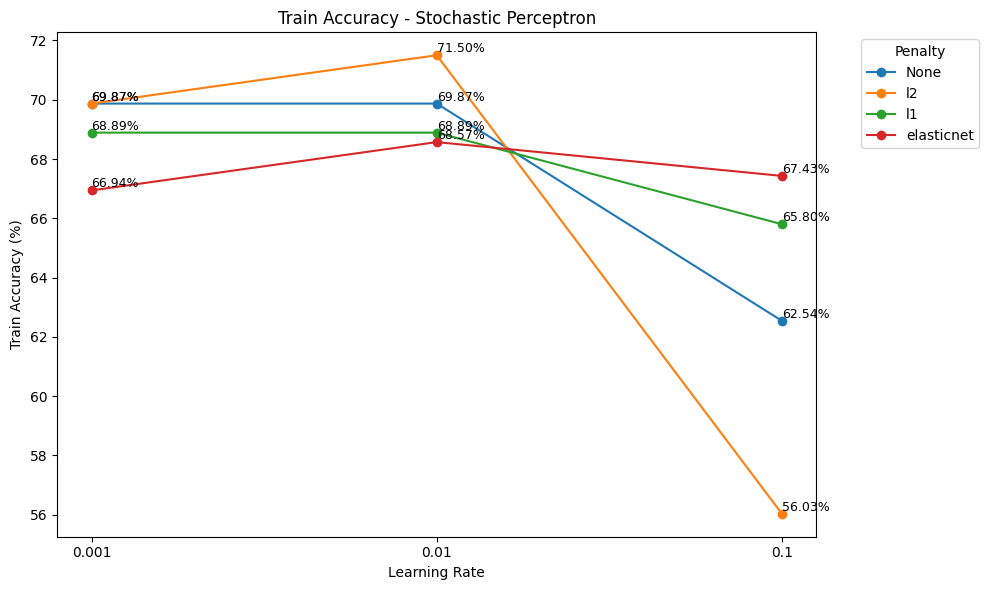

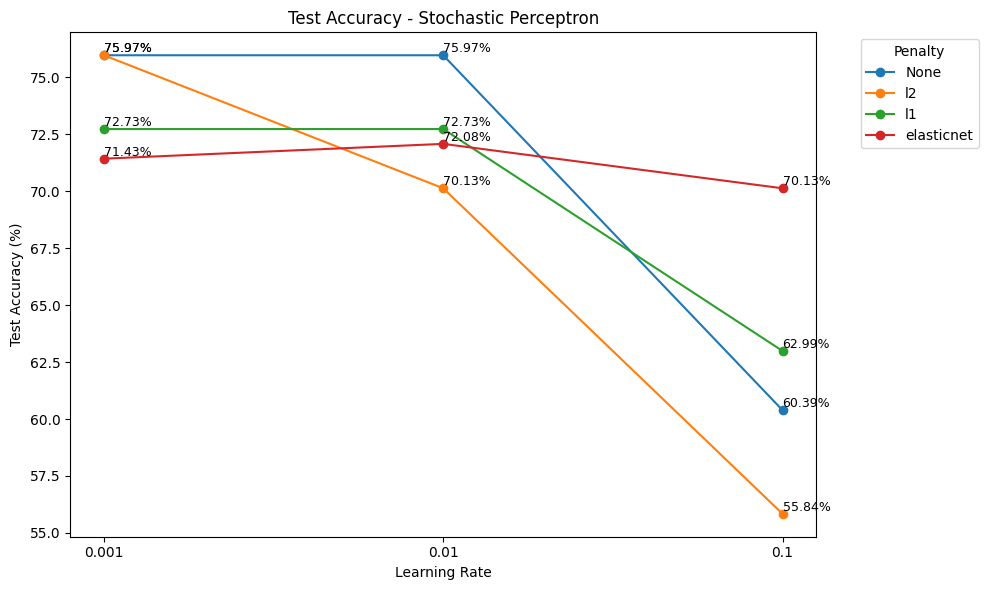

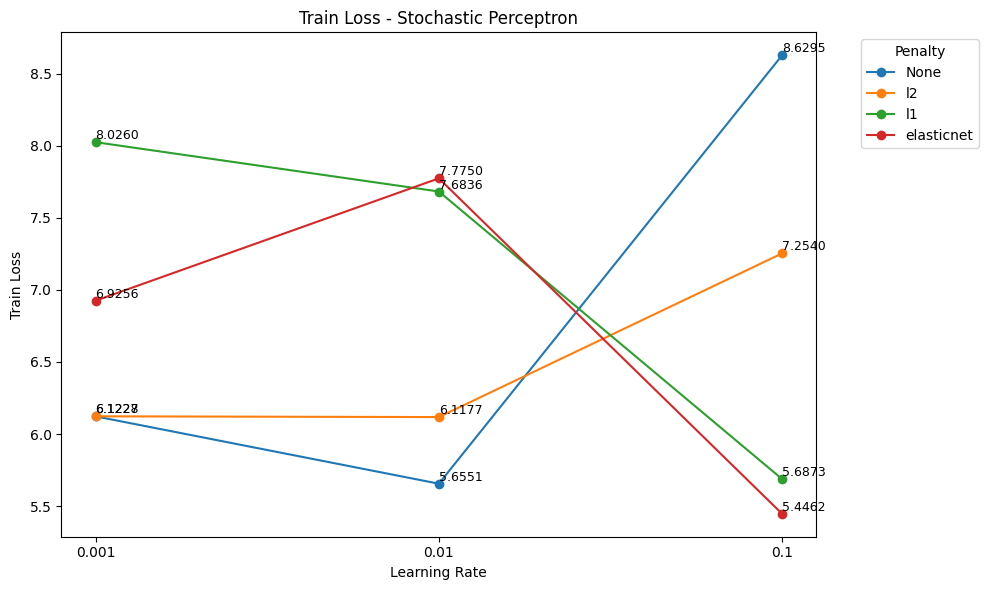

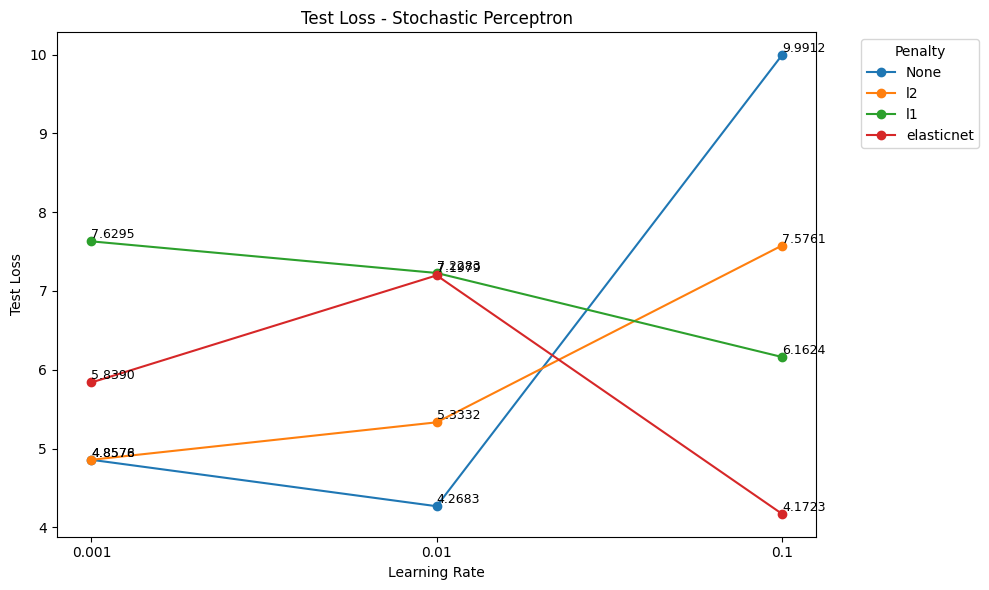

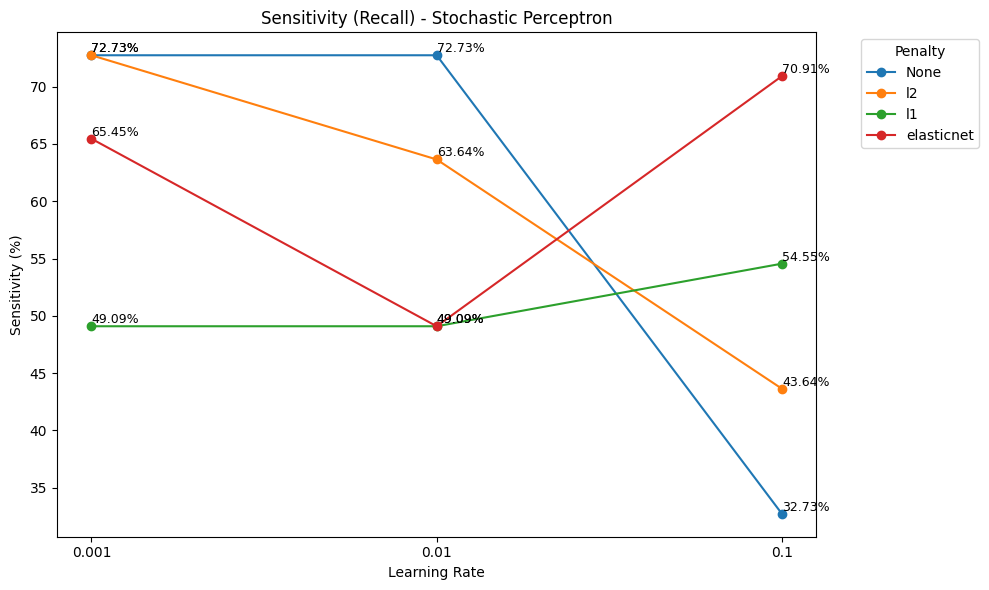

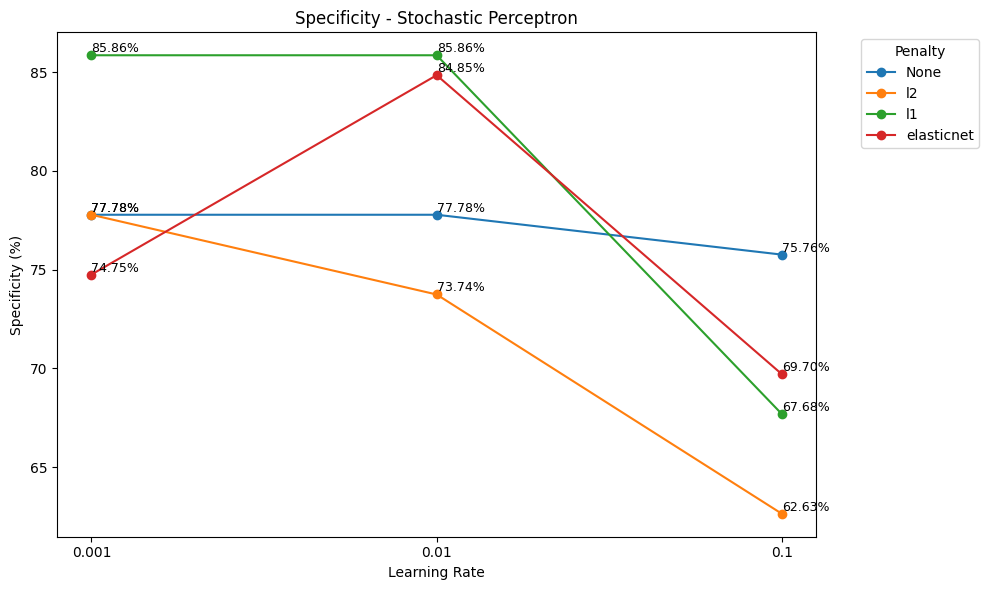

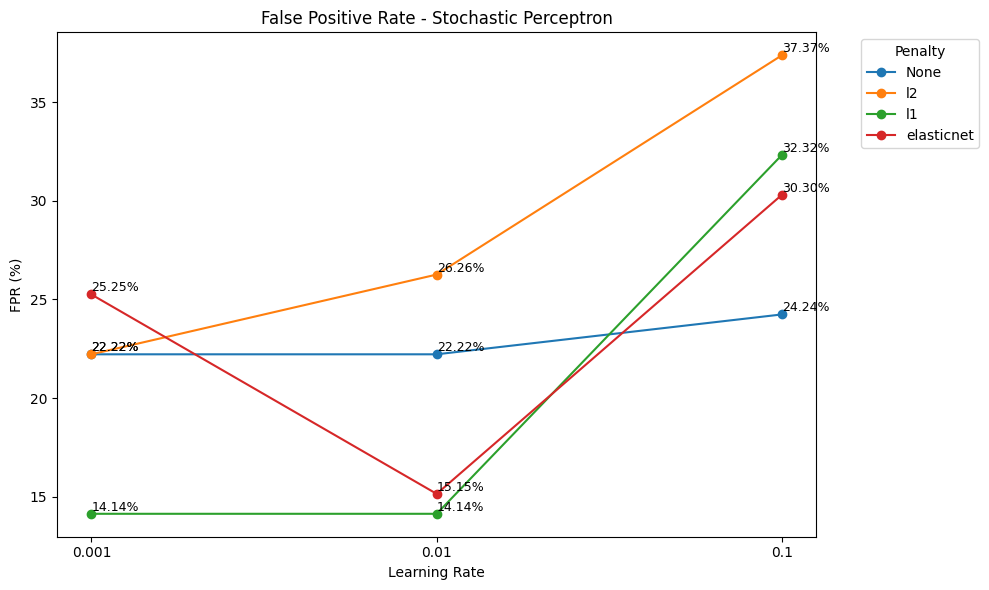

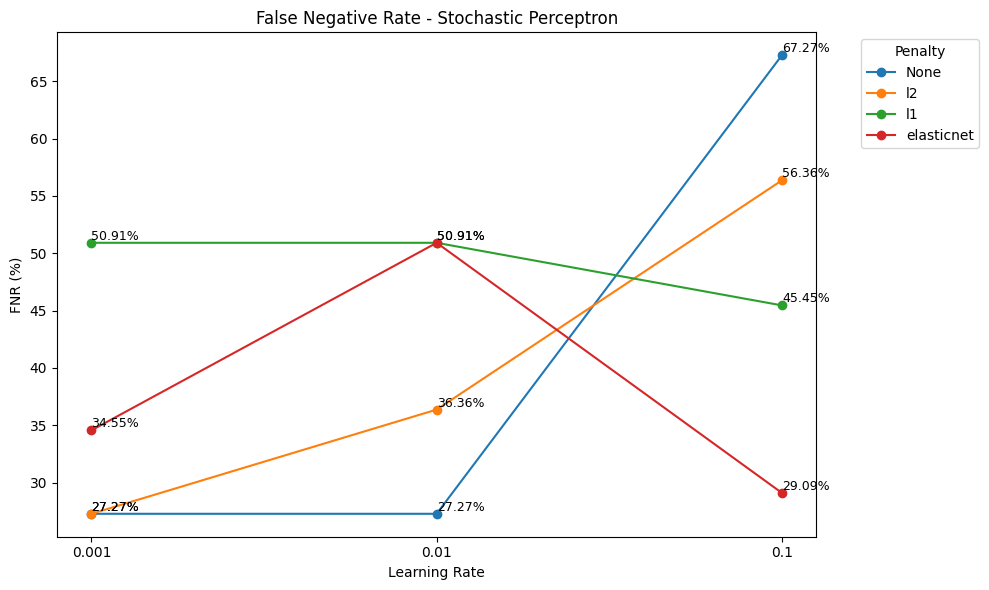

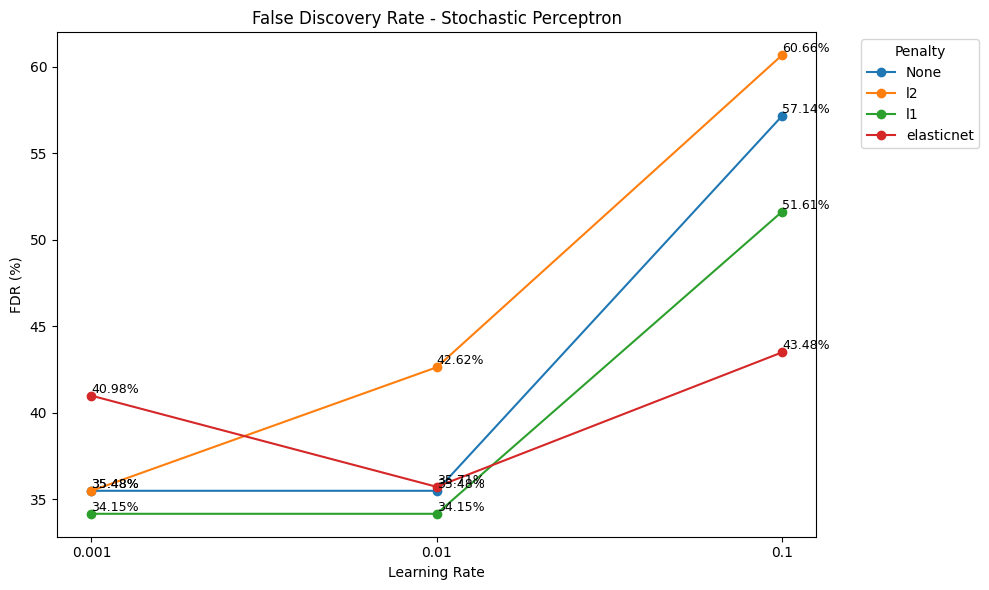

In [6]:
# Experiment 2 - Stochastic Perceptron

# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Function to plot line graphs for different metrics
def plot_metric_graph(metric_data, title, y_label, is_percentage=False):
    plt.figure(figsize=(10, 6))
    unique_penalties = set(penalties)

    for penalty in unique_penalties:
        # Get indices where the penalty matches
        indices = [i for i, p in enumerate(penalties) if p == penalty]
        # Extract corresponding learning rates and metric data
        lr = [learning_rates[i] for i in indices]
        data = [metric_data[i] for i in indices]

        # Plot the data with markers
        plt.plot(lr, data, marker='o', label=penalty)

        # Annotate each data point with its value
        for idx, x in enumerate(lr):
            y = data[idx]
            value = f'{y:.2f}%' if is_percentage else f'{y:.4f}'
            plt.text(x, y, value, verticalalignment='bottom', fontsize=9, color='black')

    # Set plot title and labels
    plt.title(f"{title} - {model_name}")
    plt.xlabel('Learning Rate')
    plt.ylabel(y_label)
    plt.legend(title='Penalty', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Data for Stochastic Perceptron
learning_rates = ['0.001', '0.01', '0.1'] * 4  # Repeat for each penalty
penalties = ['None'] * 3 + ['l2'] * 3 + ['l1'] * 3 + ['elasticnet'] * 3

# Metrics collected from experiments
train_accuracy = [69.87, 69.87, 62.54, 69.87, 71.50, 56.03, 68.89, 68.89, 65.80, 66.94, 68.57, 67.43]
test_accuracy = [75.97, 75.97, 60.39, 75.97, 70.13, 55.84, 72.73, 72.73, 62.99, 71.43, 72.08, 70.13]
train_loss = [6.12267, 5.655115, 8.629499, 6.122849, 6.117663, 7.254044, 8.02603, 7.683589, 5.687346, 6.925593, 7.775006, 5.446175]
test_loss = [4.857644, 4.268333, 9.991152, 4.857778, 5.333208, 7.57605, 7.629547, 7.228342, 6.162376, 5.838954, 7.197867, 4.172346]
sensitivity = [72.73, 72.73, 32.73, 72.73, 63.64, 43.64, 49.09, 49.09, 54.55, 65.45, 49.09, 70.91]
specificity = [77.78, 77.78, 75.76, 77.78, 73.74, 62.63, 85.86, 85.86, 67.68, 74.75, 84.85, 69.70]
fpr = [22.22, 22.22, 24.24, 22.22, 26.26, 37.37, 14.14, 14.14, 32.32, 25.25, 15.15, 30.30]
fnr = [27.27, 27.27, 67.27, 27.27, 36.36, 56.36, 50.91, 50.91, 45.45, 34.55, 50.91, 29.09]
fdr = [35.48, 35.48, 57.14, 35.48, 42.62, 60.66, 34.15, 34.15, 51.61, 40.98, 35.71, 43.48]

model_name = "Stochastic Perceptron"

# Plot graphs for all metrics
plot_metric_graph(train_accuracy, 'Train Accuracy', 'Train Accuracy (%)', is_percentage=True)
plot_metric_graph(test_accuracy, 'Test Accuracy', 'Test Accuracy (%)', is_percentage=True)
plot_metric_graph(train_loss, 'Train Loss', 'Train Loss', is_percentage=False)
plot_metric_graph(test_loss, 'Test Loss', 'Test Loss', is_percentage=False)
plot_metric_graph(sensitivity, 'Sensitivity (Recall)', 'Sensitivity (%)', is_percentage=True)
plot_metric_graph(specificity, 'Specificity', 'Specificity (%)', is_percentage=True)
plot_metric_graph(fpr, 'False Positive Rate', 'FPR (%)', is_percentage=True)
plot_metric_graph(fnr, 'False Negative Rate', 'FNR (%)', is_percentage=True)
plot_metric_graph(fdr, 'False Discovery Rate', 'FDR (%)', is_percentage=True)



## Line Graphs - Weighted Perceptron

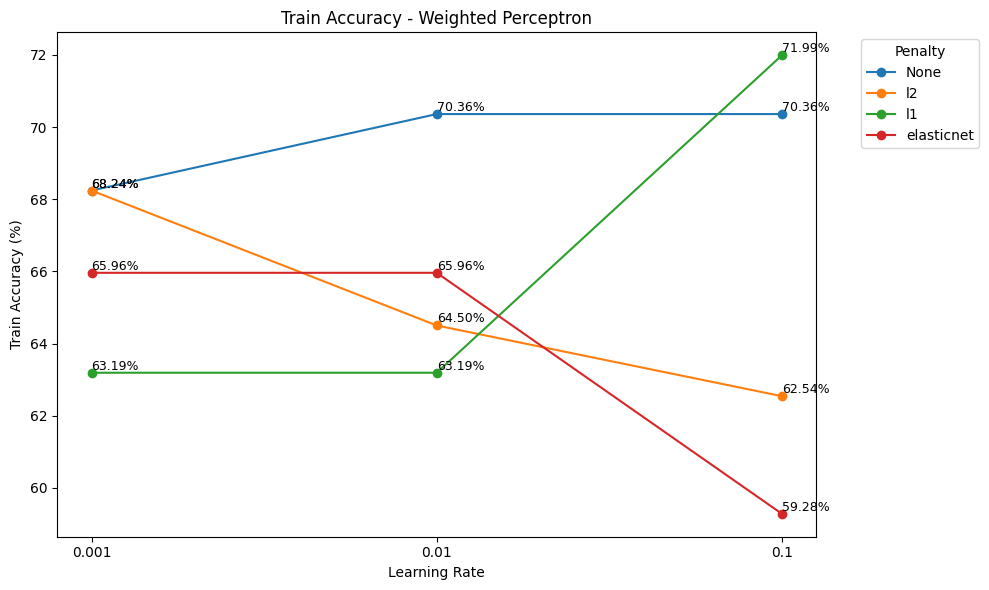

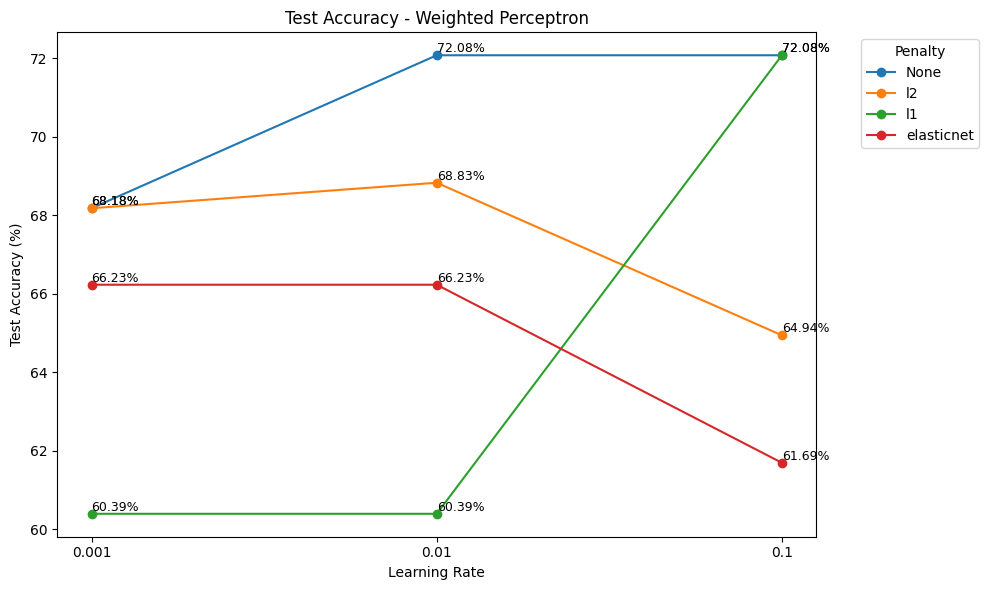

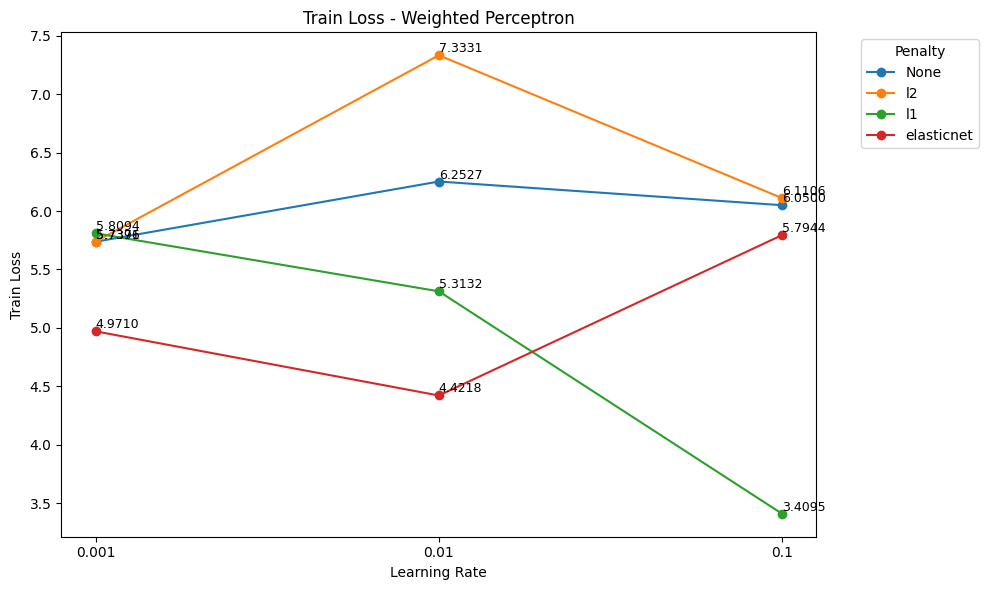

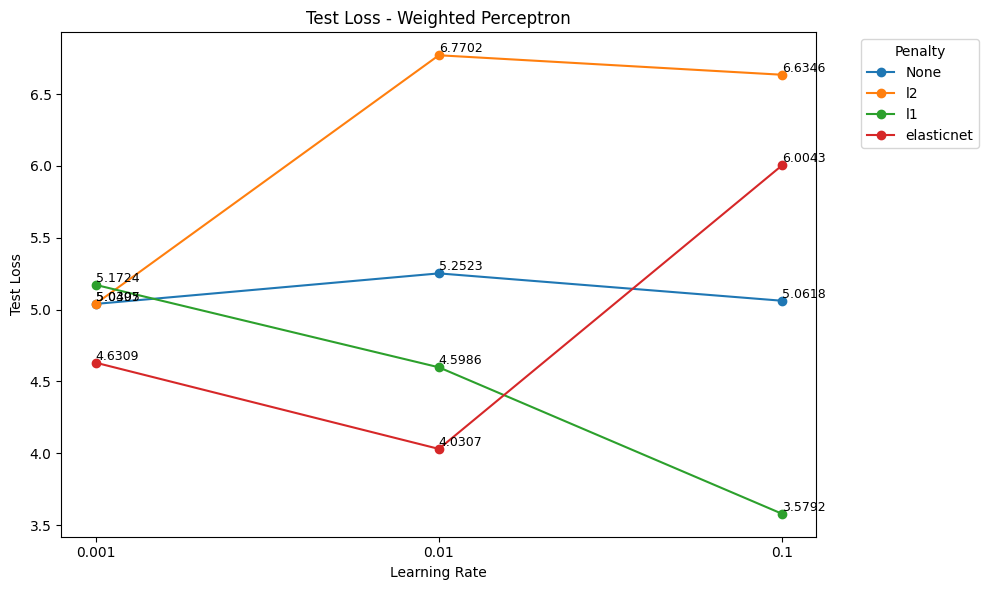

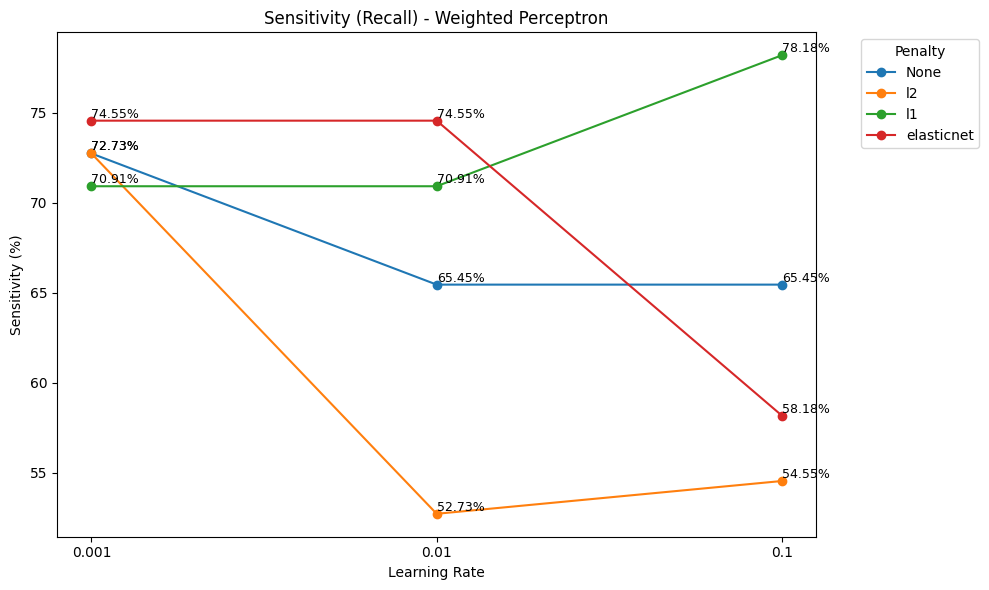

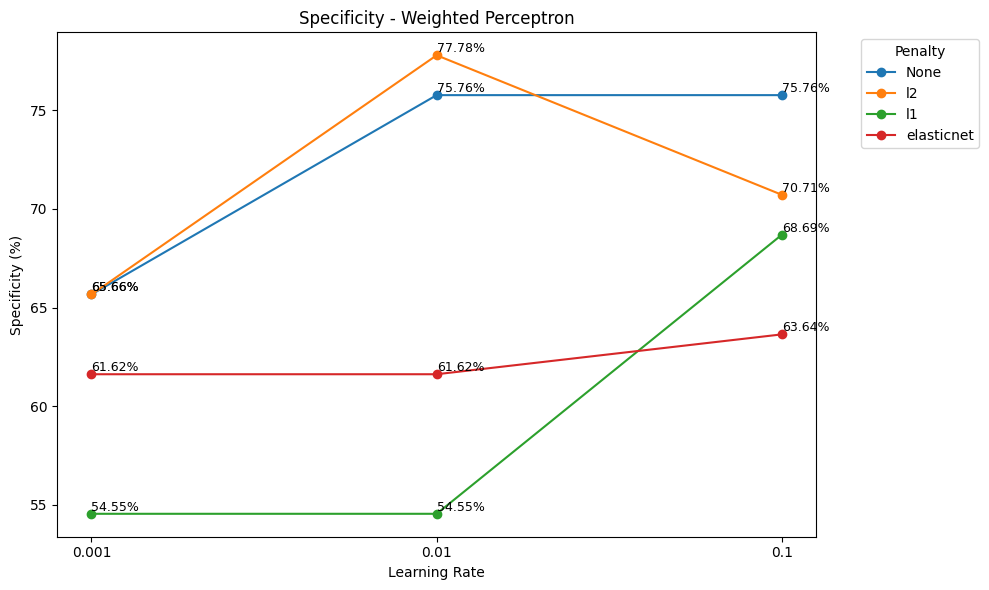

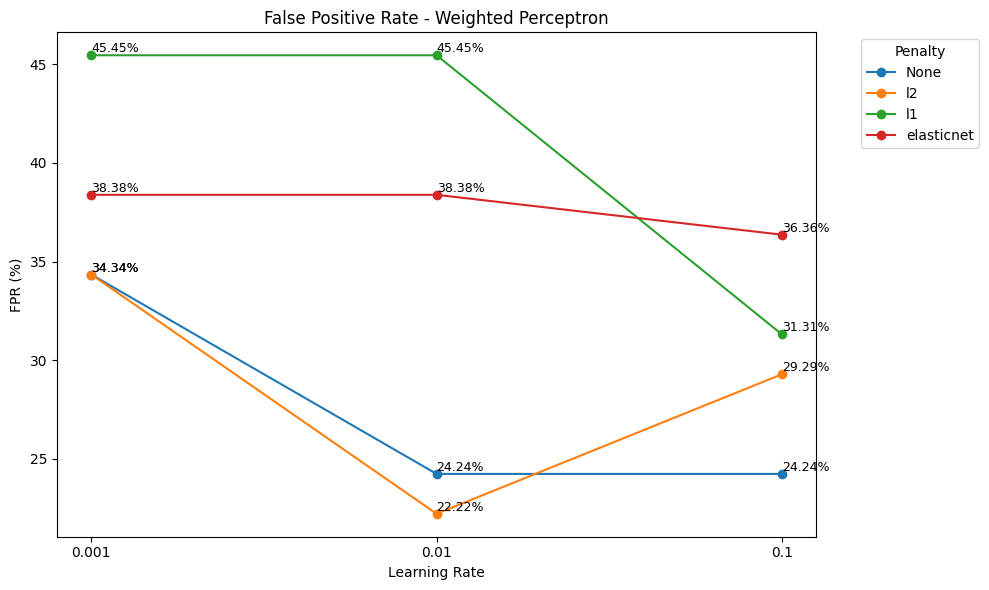

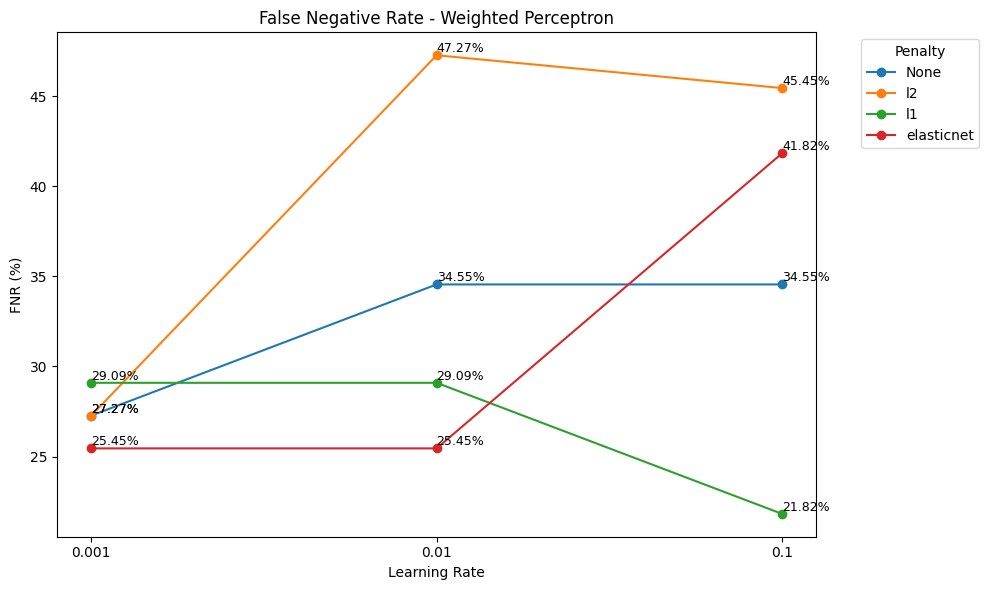

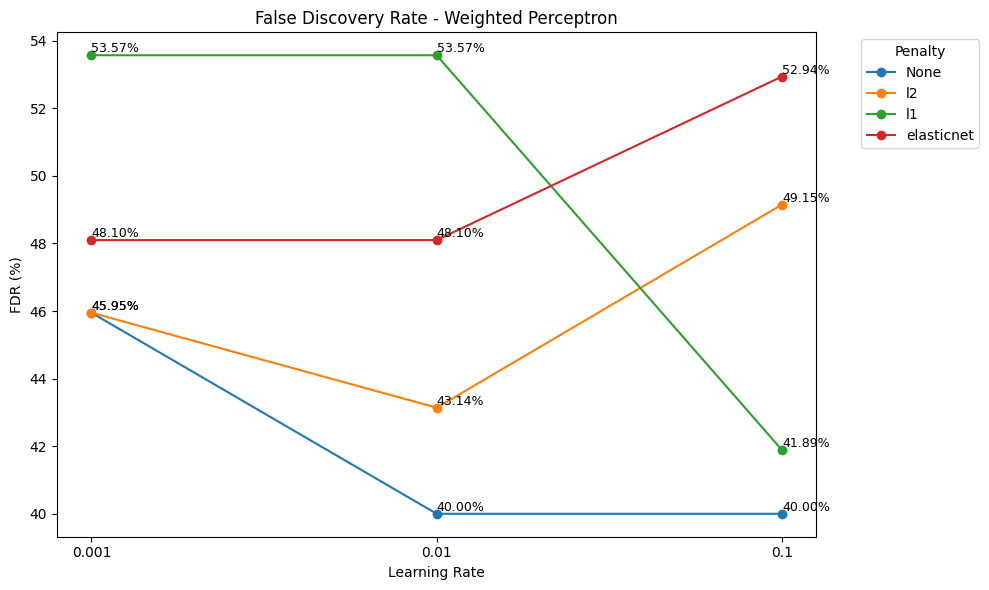

In [4]:
# Experiment 3 - Weighted Perceptron

# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Function to plot line graphs for different metrics
def plot_metric_graph(metric_data, title, y_label, is_percentage=False):
    plt.figure(figsize=(10, 6))
    unique_penalties = set(penalties)

    for penalty in unique_penalties:
        # Get indices where the penalty matches
        indices = [i for i, p in enumerate(penalties) if p == penalty]
        # Extract corresponding learning rates and metric data
        lr = [learning_rates[i] for i in indices]
        data = [metric_data[i] for i in indices]

        # Plot the data with markers
        plt.plot(lr, data, marker='o', label=penalty)

        # Annotate each data point with its value
        for idx, x in enumerate(lr):
            y = data[idx]
            value = f'{y:.2f}%' if is_percentage else f'{y:.4f}'
            plt.text(x, y, value, verticalalignment='bottom', fontsize=9, color='black')

    # Set plot title and labels
    plt.title(f"{title} - {model_name}")
    plt.xlabel('Learning Rate')
    plt.ylabel(y_label)
    plt.legend(title='Penalty', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Data for Weighted Perceptron
learning_rates = ['0.001', '0.01', '0.1'] * 4
penalties = ['None'] * 3 + ['l2'] * 3 + ['l1'] * 3 + ['elasticnet'] * 3

# Metrics collected from experiments
train_accuracy = [68.24, 70.36, 70.36, 68.24, 64.50, 62.54,
                  63.19, 63.19, 71.99, 65.96, 65.96, 59.28]
test_accuracy = [68.18, 72.08, 72.08, 68.18, 68.83, 64.94,
                 60.39, 60.39, 72.08, 66.23, 66.23, 61.69]
train_loss = [5.737638, 6.25274, 6.049973, 5.73908, 7.333089, 6.110619,
              5.809395, 5.313157, 3.409511, 4.970986, 4.42176, 5.794391]
test_loss = [5.039657, 5.252267, 5.061798, 5.040549, 6.770249, 6.634579,
             5.17242, 4.59863, 3.579163, 4.630918, 4.030719, 6.004313]
sensitivity = [72.73, 65.45, 65.45, 72.73, 52.73, 54.55,
               70.91, 70.91, 78.18, 74.55, 74.55, 58.18]
specificity = [65.66, 75.76, 75.76, 65.66, 77.78, 70.71,
               54.55, 54.55, 68.69, 61.62, 61.62, 63.64]
fpr = [34.34, 24.24, 24.24, 34.34, 22.22, 29.29,
       45.45, 45.45, 31.31, 38.38, 38.38, 36.36]
fnr = [27.27, 34.55, 34.55, 27.27, 47.27, 45.45,
       29.09, 29.09, 21.82, 25.45, 25.45, 41.82]
fdr = [45.95, 40.00, 40.00, 45.95, 43.14, 49.15,
       53.57, 53.57, 41.89, 48.10, 48.10, 52.94]

model_name = "Weighted Perceptron"

# Plot graphs for all metrics
plot_metric_graph(train_accuracy, 'Train Accuracy', 'Train Accuracy (%)', is_percentage=True)
plot_metric_graph(test_accuracy, 'Test Accuracy', 'Test Accuracy (%)', is_percentage=True)
plot_metric_graph(train_loss, 'Train Loss', 'Train Loss', is_percentage=False)
plot_metric_graph(test_loss, 'Test Loss', 'Test Loss', is_percentage=False)
plot_metric_graph(sensitivity, 'Sensitivity (Recall)', 'Sensitivity (%)', is_percentage=True)
plot_metric_graph(specificity, 'Specificity', 'Specificity (%)', is_percentage=True)
plot_metric_graph(fpr, 'False Positive Rate', 'FPR (%)', is_percentage=True)
plot_metric_graph(fnr, 'False Negative Rate', 'FNR (%)', is_percentage=True)
plot_metric_graph(fdr, 'False Discovery Rate', 'FDR (%)', is_percentage=True)


## Line Graphs - Perceptron with SMOTE

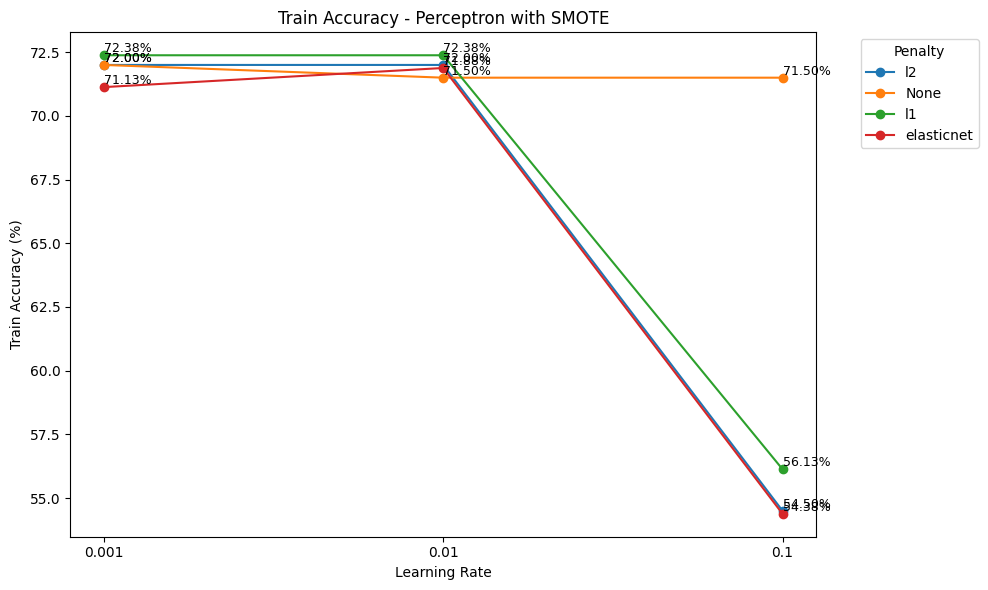

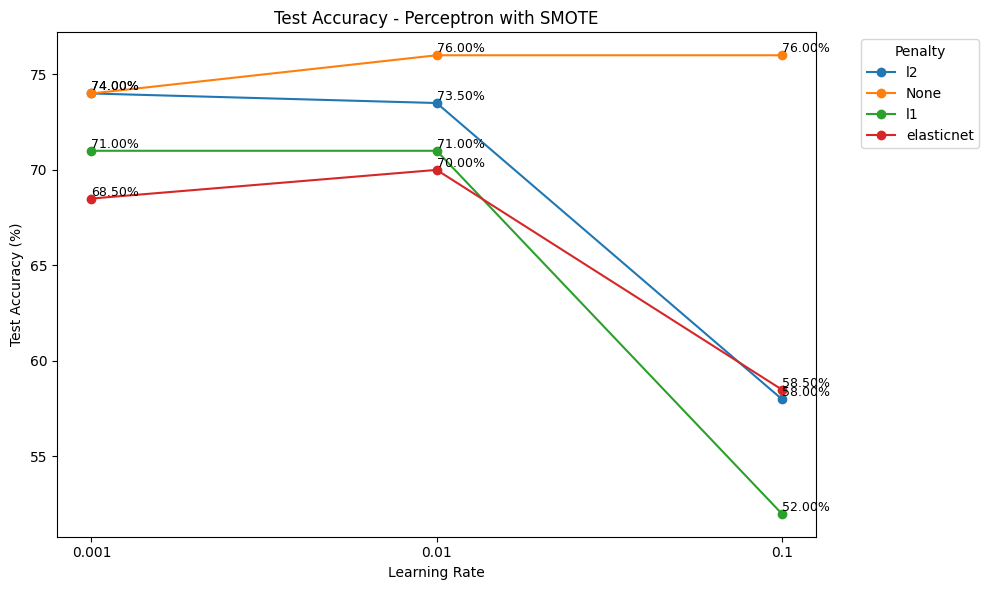

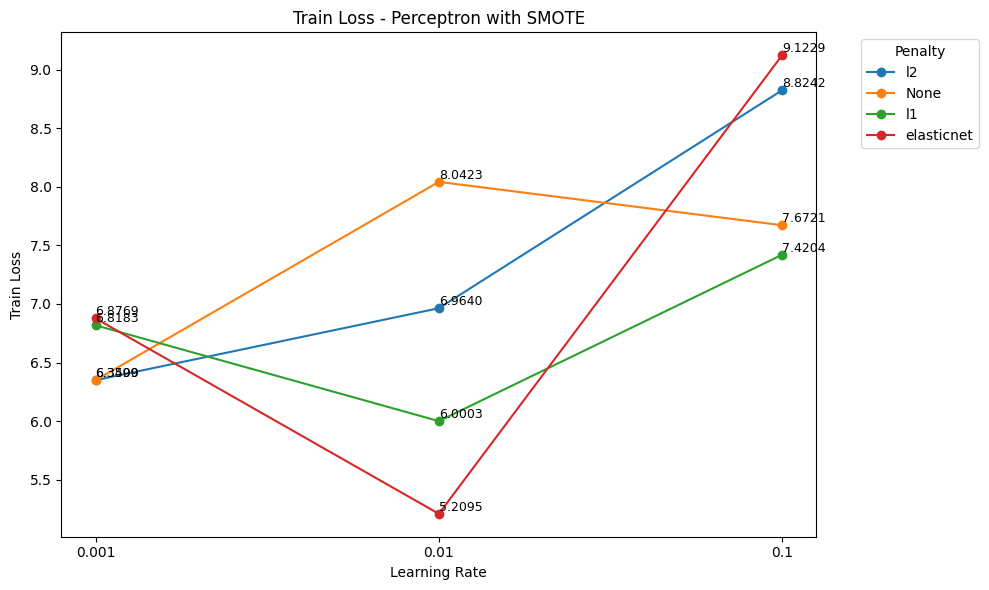

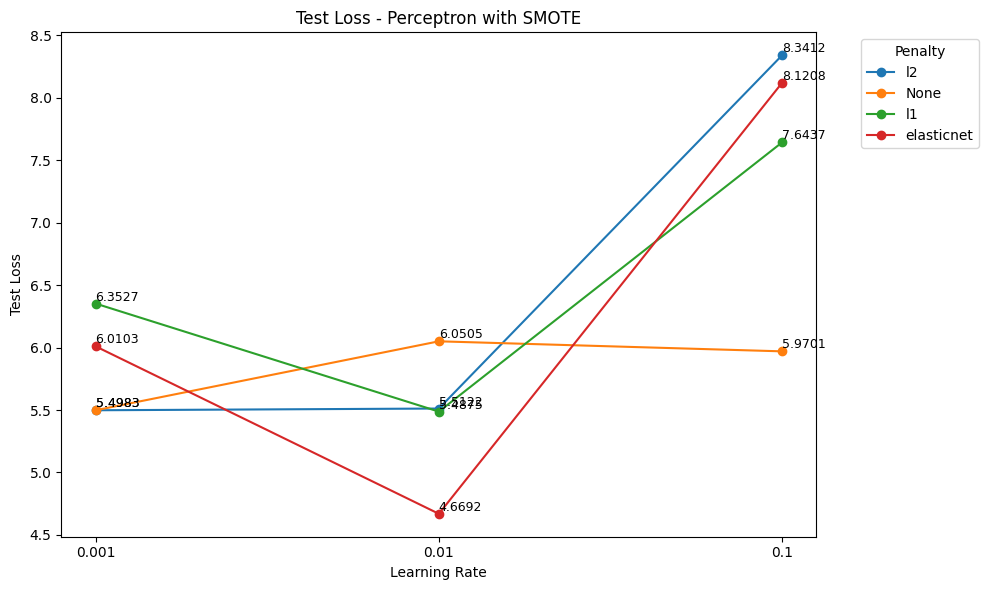

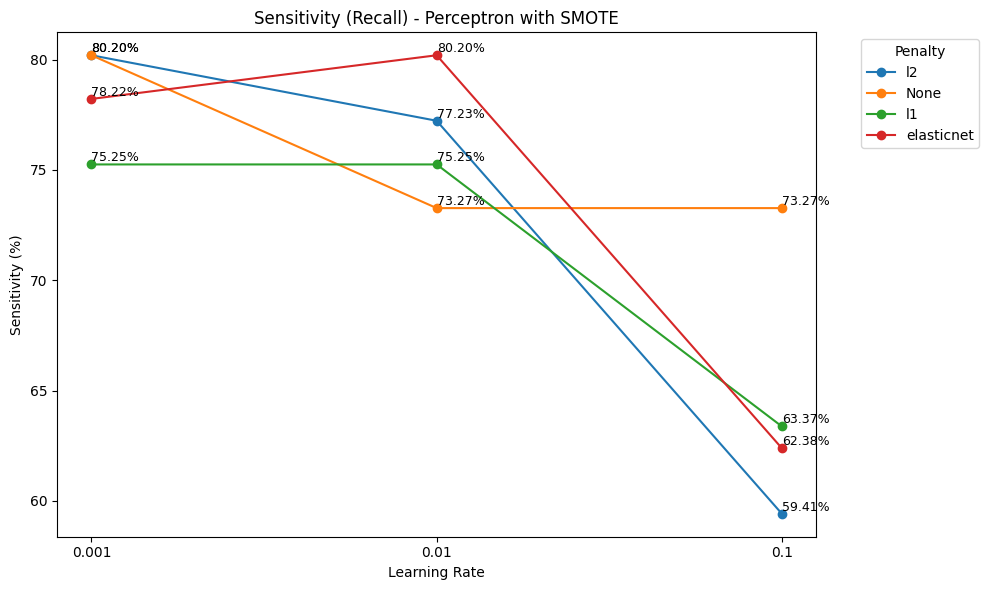

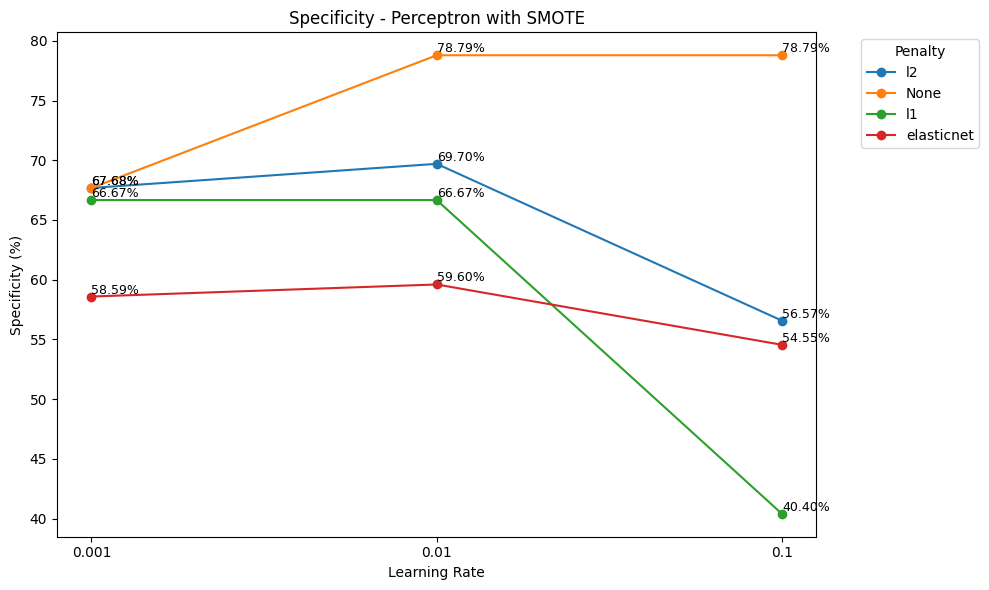

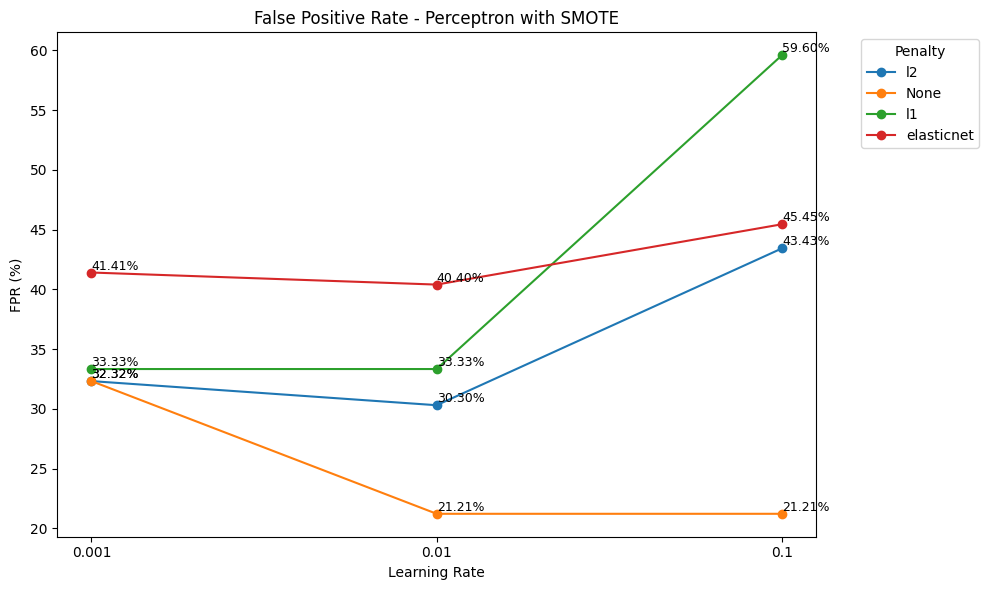

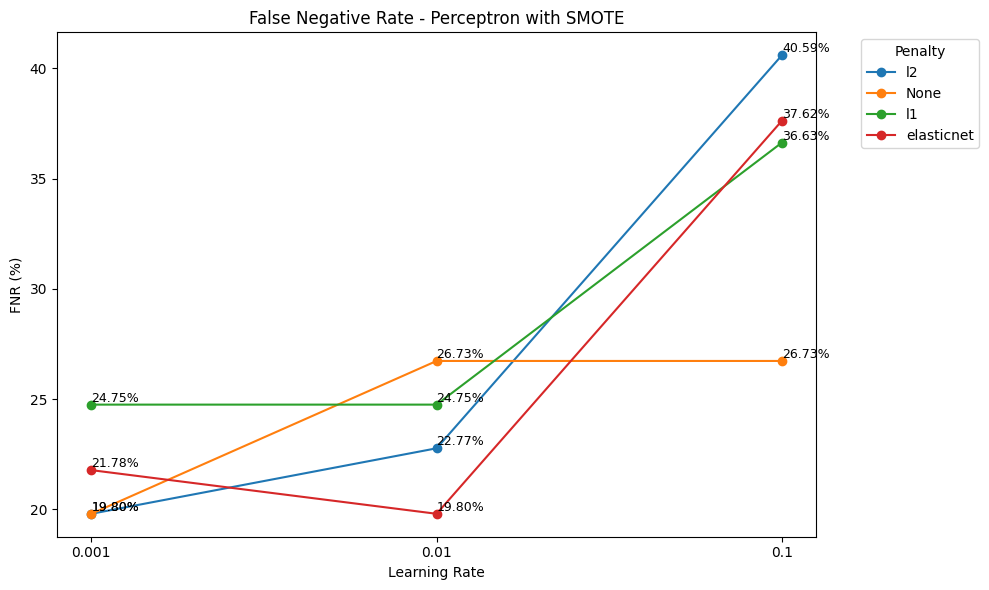

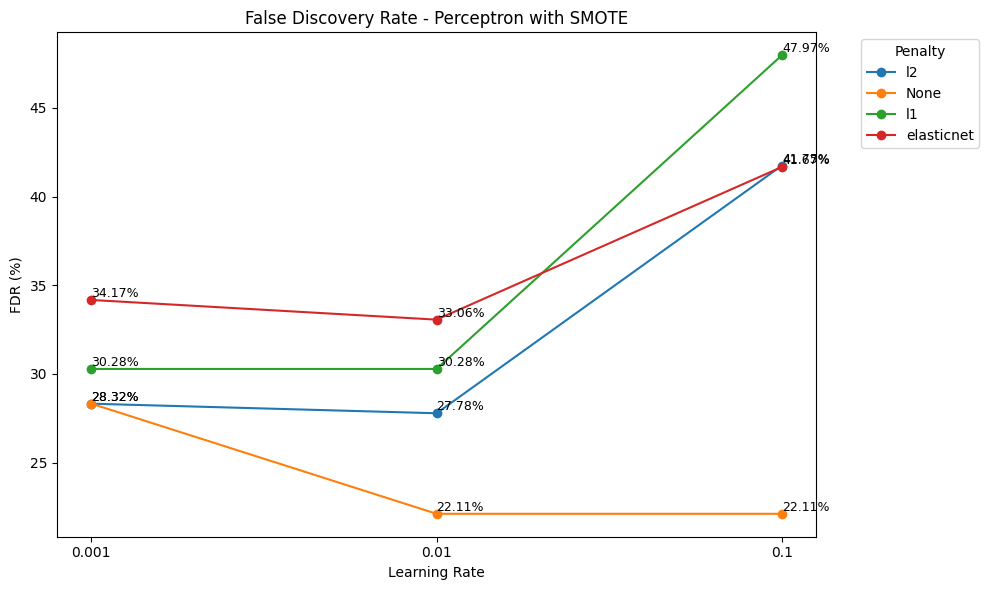

In [ ]:
# Experiment 4 - Perceptron with SMOTE

# Import libraries
import matplotlib.pyplot as plt
import numpy as np

# Function to plot line graphs for different metrics
def plot_metric_graph(metric_data, title, y_label, is_percentage=False):
    plt.figure(figsize=(10, 6))
    unique_penalties = set(penalties)

    for penalty in unique_penalties:
        # Get indices where the penalty matches
        indices = [i for i, p in enumerate(penalties) if p == penalty]
        # Extract corresponding learning rates and metric data
        lr = [learning_rates[i] for i in indices]
        data = [metric_data[i] for i in indices]

        # Plot the data with markers
        plt.plot(lr, data, marker='o', label=penalty)

        # Annotate each data point with its value
        for idx, x in enumerate(lr):
            y = data[idx]
            value = f'{y:.2f}%' if is_percentage else f'{y:.4f}'
            plt.text(x, y, value, verticalalignment='bottom', fontsize=9, color='black')

    # Set plot title and labels
    plt.title(f"{title} - {model_name}")
    plt.xlabel('Learning Rate')
    plt.ylabel(y_label)
    plt.legend(title='Penalty', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Data for Perceptron with SMOTE
learning_rates = ['0.001', '0.01', '0.1'] * 4
penalties = ['None'] * 3 + ['l2'] * 3 + ['l1'] * 3 + ['elasticnet'] * 3

# Metrics collected from experiments
train_accuracy = [72.00, 71.50, 71.50, 72.00, 72.00, 54.50,
                  72.38, 72.38, 56.13, 71.13, 71.88, 54.38]
test_accuracy = [74.00, 76.00, 76.00, 74.00, 73.50, 58.00,
                 71.00, 71.00, 52.00, 68.50, 70.00, 58.50]
train_loss = [6.349944, 8.04229, 7.672104, 6.349967, 6.964011, 8.824165,
              6.818281, 6.00031, 7.420388, 6.876901, 5.209462, 9.122873]
test_loss = [5.498263, 6.050475, 5.970093, 5.498308, 5.512179, 8.341199,
             6.352682, 5.487452, 7.643676, 6.010305, 4.669211, 8.120826]
sensitivity = [80.20, 73.27, 73.27, 80.20, 77.23, 59.41,
               75.25, 75.25, 63.37, 78.22, 80.20, 62.38]
specificity = [67.68, 78.79, 78.79, 67.68, 69.70, 56.57,
               66.67, 66.67, 40.40, 58.59, 59.60, 54.55]
fpr = [32.32, 21.21, 21.21, 32.32, 30.30, 43.43,
       33.33, 33.33, 59.60, 41.41, 40.40, 45.45]
fnr = [19.80, 26.73, 26.73, 19.80, 22.77, 40.59,
       24.75, 24.75, 36.63, 21.78, 19.80, 37.62]
fdr = [28.32, 22.11, 22.11, 28.32, 27.78, 41.75,
       30.28, 30.28, 47.97, 34.17, 33.06, 41.67]

model_name = "Perceptron with SMOTE"

# Plot graphs for all metrics
plot_metric_graph(train_accuracy, 'Train Accuracy', 'Train Accuracy (%)', is_percentage=True)
plot_metric_graph(test_accuracy, 'Test Accuracy', 'Test Accuracy (%)', is_percentage=True)
plot_metric_graph(train_loss, 'Train Loss', 'Train Loss', is_percentage=False)
plot_metric_graph(test_loss, 'Test Loss', 'Test Loss', is_percentage=False)
plot_metric_graph(sensitivity, 'Sensitivity (Recall)', 'Sensitivity (%)', is_percentage=True)
plot_metric_graph(specificity, 'Specificity', 'Specificity (%)', is_percentage=True)
plot_metric_graph(fpr, 'False Positive Rate', 'FPR (%)', is_percentage=True)
plot_metric_graph(fnr, 'False Negative Rate', 'FNR (%)', is_percentage=True)
plot_metric_graph(fdr, 'False Discovery Rate', 'FDR (%)', is_percentage=True)


## Line Graphs - Multilayer Perceptron

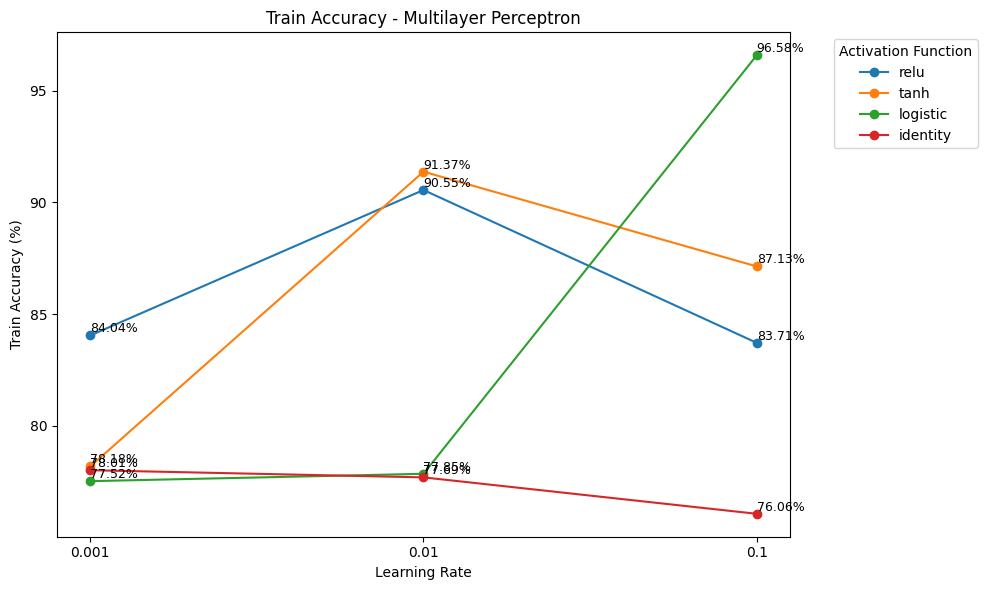

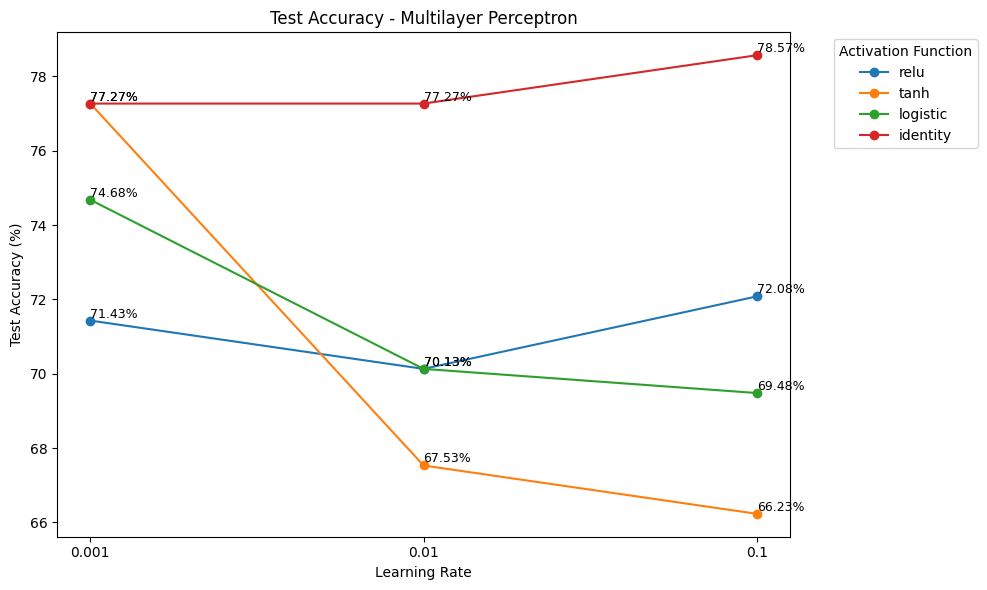

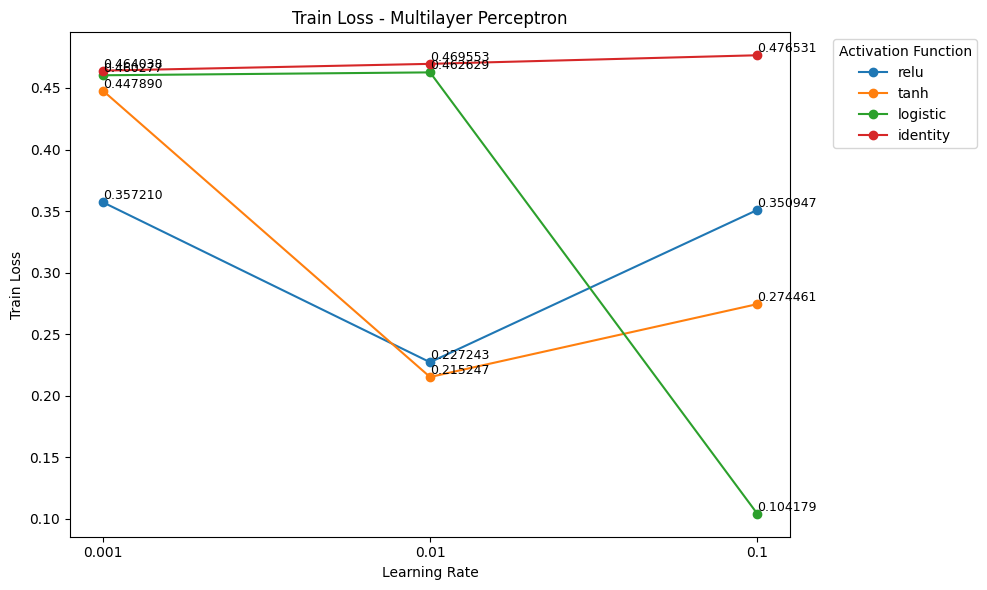

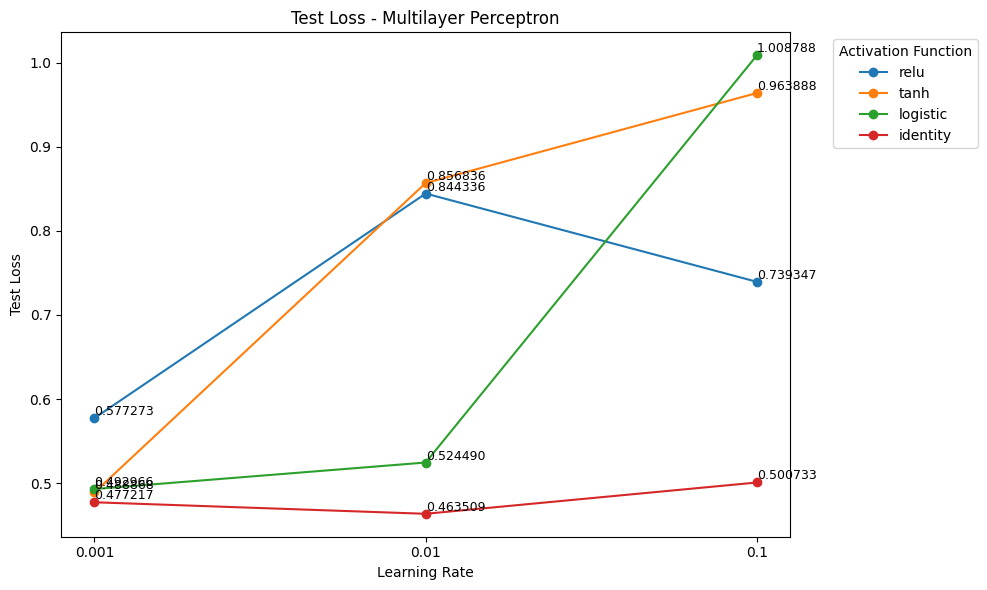

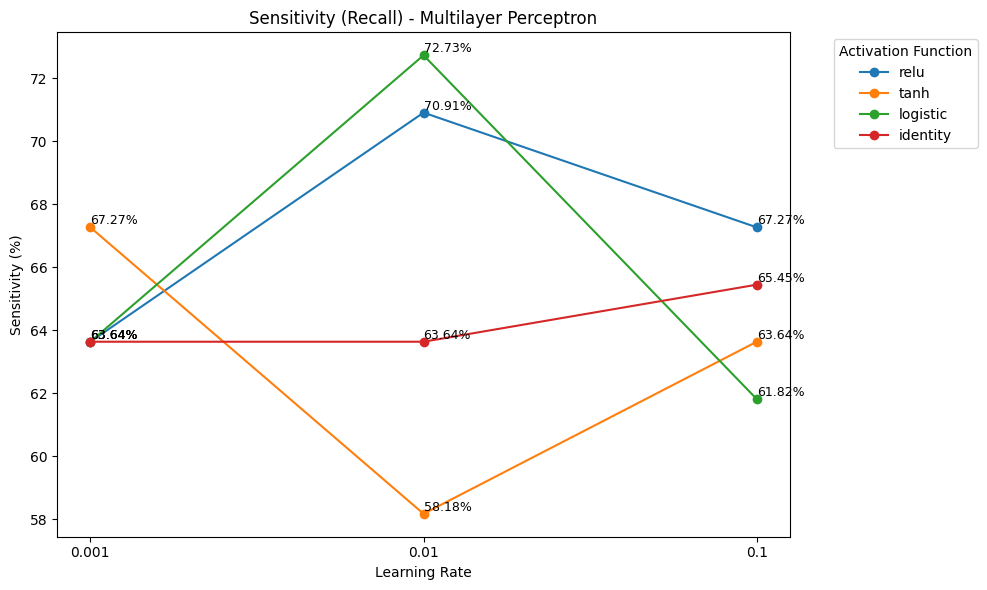

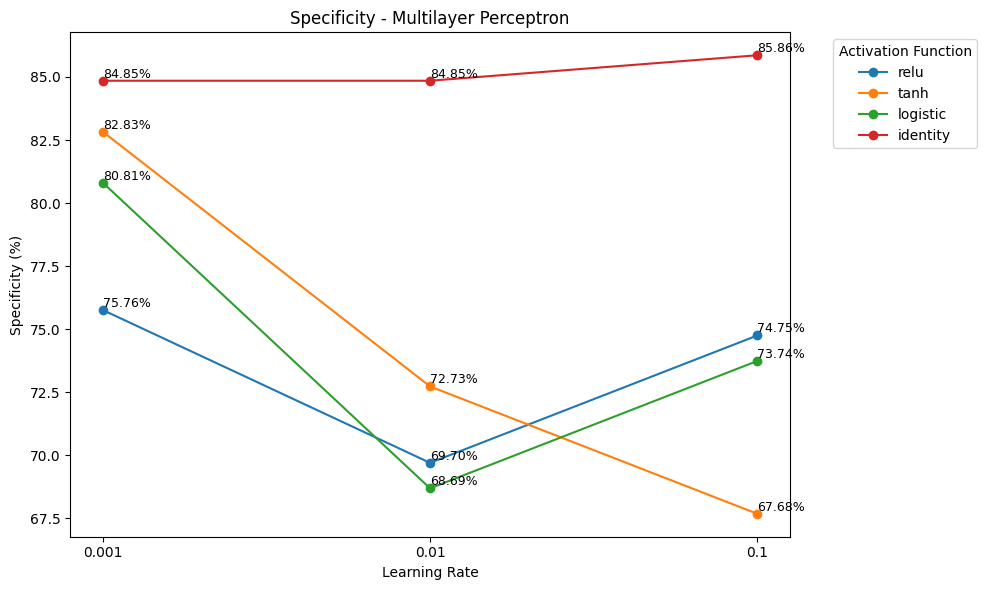

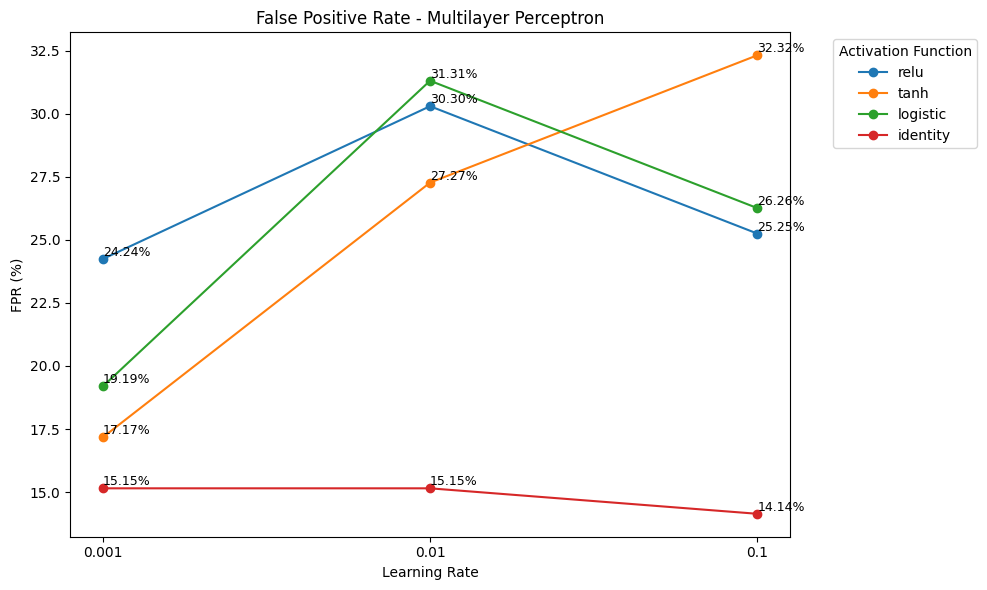

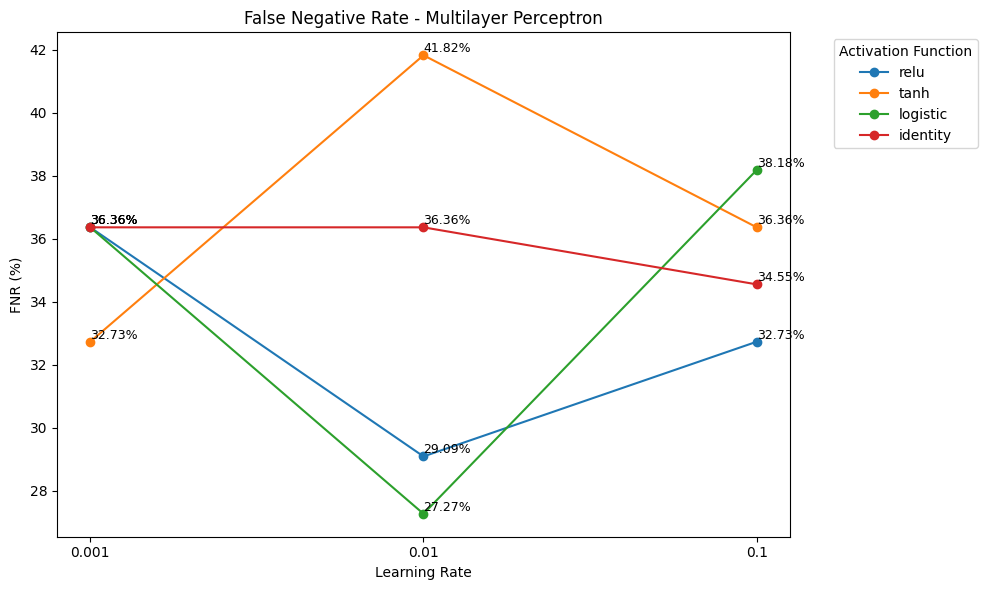

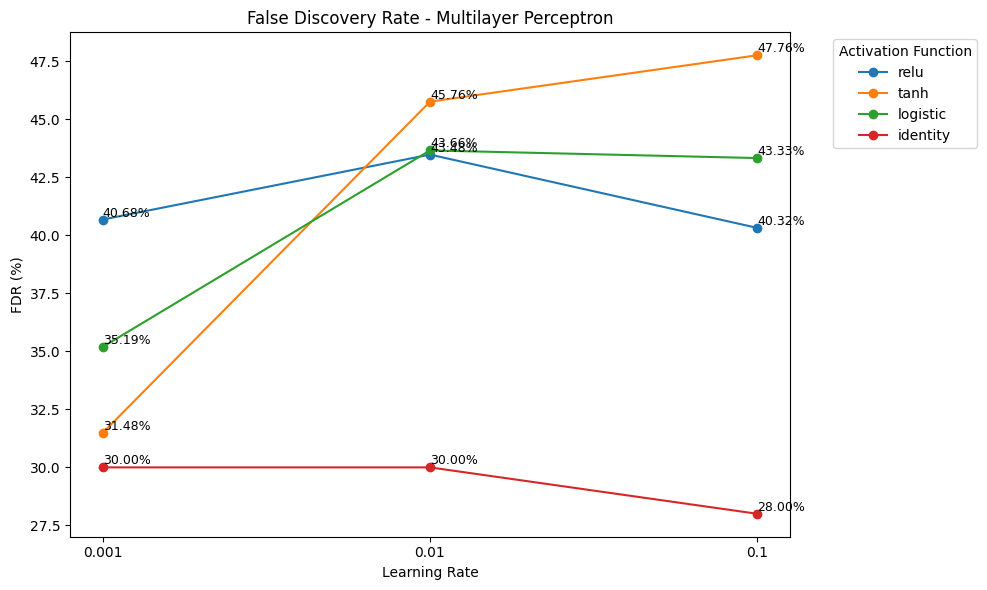

In [ ]:
# Experiment 5 - Multilayer Perceptron

# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Function to plot line graphs for MLP metrics
def plot_mlp_metric_graph(metric_data, title, y_label, is_percentage=False):
    plt.figure(figsize=(10, 6))
    unique_activations = set(activation_functions)

    for activation in unique_activations:
        # Get indices where the activation function matches
        indices = [i for i, a in enumerate(activation_functions) if a == activation]
        # Extract corresponding learning rates and metric data
        lr = [learning_rates[i] for i in indices]
        data = [metric_data[i] for i in indices]

        # Plot the data with markers
        plt.plot(lr, data, marker='o', label=activation)

        # Annotate each data point with its value
        for idx, x in enumerate(lr):
            y = data[idx]
            value = f'{y:.2f}%' if is_percentage else f'{y:.6f}'
            plt.text(x, y, value, verticalalignment='bottom', fontsize=9, color='black')

    # Set plot title and labels
    plt.title(f"{title} - {model_name}")
    plt.xlabel('Learning Rate')
    plt.ylabel(y_label)
    plt.legend(title='Activation Function', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Data for Multilayer Perceptron Parameter Tuning
activation_functions = ['identity', 'logistic', 'tanh', 'relu'] * 3
learning_rates = ['0.001'] * 4 + ['0.01'] * 4 + ['0.1'] * 4

# Metric values from experiments
train_accuracy = [78.01, 77.52, 78.18, 84.04, 77.69, 77.85,
                  91.37, 90.55, 76.06, 96.58, 87.13, 83.71]
test_accuracy = [77.27, 74.68, 77.27, 71.43, 77.27, 70.13,
                 67.53, 70.13, 78.57, 69.48, 66.23, 72.08]
train_loss = [0.464038, 0.460277, 0.447890, 0.357210, 0.469553, 0.462629,
              0.215247, 0.227243, 0.476531, 0.104179, 0.274461, 0.350947]
test_loss = [0.477217, 0.492966, 0.488868, 0.577273, 0.463509, 0.524490,
             0.856836, 0.844336, 0.500733, 1.008788, 0.963888, 0.739347]
sensitivity = [63.64, 63.64, 67.27, 63.64, 63.64, 72.73,
               58.18, 70.91, 65.45, 61.82, 63.64, 67.27]
specificity = [84.85, 80.81, 82.83, 75.76, 84.85, 68.69,
               72.73, 69.70, 85.86, 73.74, 67.68, 74.75]
fpr = [15.15, 19.19, 17.17, 24.24, 15.15, 31.31,
       27.27, 30.30, 14.14, 26.26, 32.32, 25.25]
fnr = [36.36, 36.36, 32.73, 36.36, 36.36, 27.27,
       41.82, 29.09, 34.55, 38.18, 36.36, 32.73]
fdr = [30.00, 35.19, 31.48, 40.68, 30.00, 43.66,
       45.76, 43.48, 28.00, 43.33, 47.76, 40.32]

model_name = "Multilayer Perceptron"

# Plot graphs for all metrics
plot_mlp_metric_graph(train_accuracy, 'Train Accuracy', 'Train Accuracy (%)', is_percentage=True)
plot_mlp_metric_graph(test_accuracy, 'Test Accuracy', 'Test Accuracy (%)', is_percentage=True)
plot_mlp_metric_graph(train_loss, 'Train Loss', 'Train Loss', is_percentage=False)
plot_mlp_metric_graph(test_loss, 'Test Loss', 'Test Loss', is_percentage=False)
plot_mlp_metric_graph(sensitivity, 'Sensitivity (Recall)', 'Sensitivity (%)', is_percentage=True)
plot_mlp_metric_graph(specificity, 'Specificity', 'Specificity (%)', is_percentage=True)
plot_mlp_metric_graph(fpr, 'False Positive Rate', 'FPR (%)', is_percentage=True)
plot_mlp_metric_graph(fnr, 'False Negative Rate', 'FNR (%)', is_percentage=True)
plot_mlp_metric_graph(fdr, 'False Discovery Rate', 'FDR (%)', is_percentage=True)


## Comparison Graphs of Averages Obtained

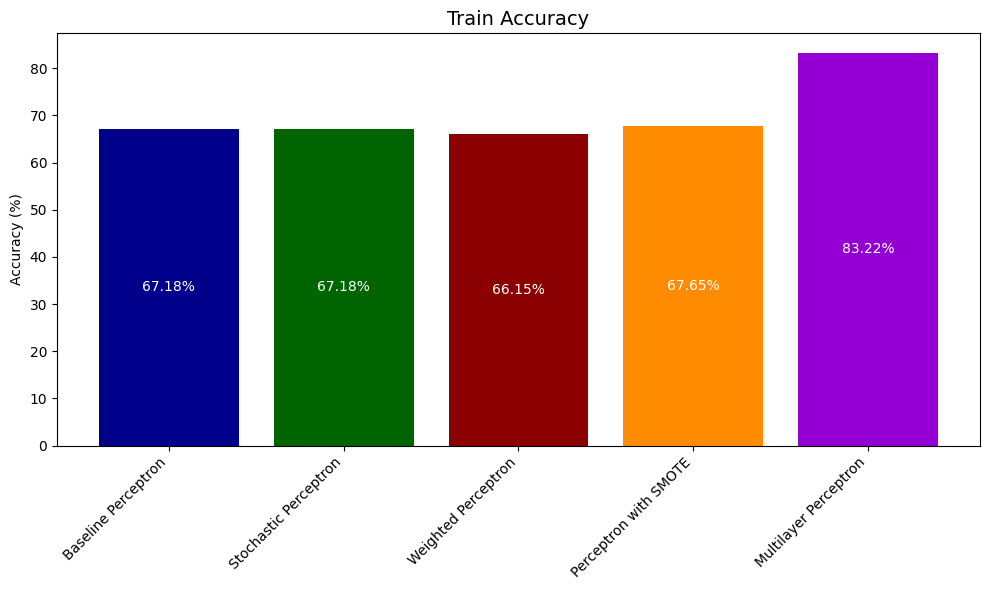

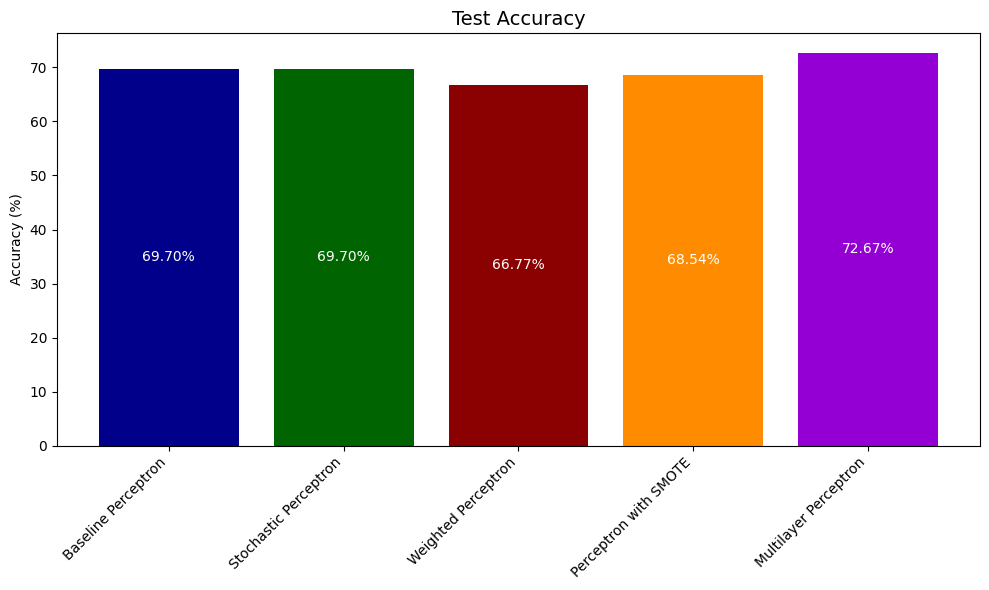

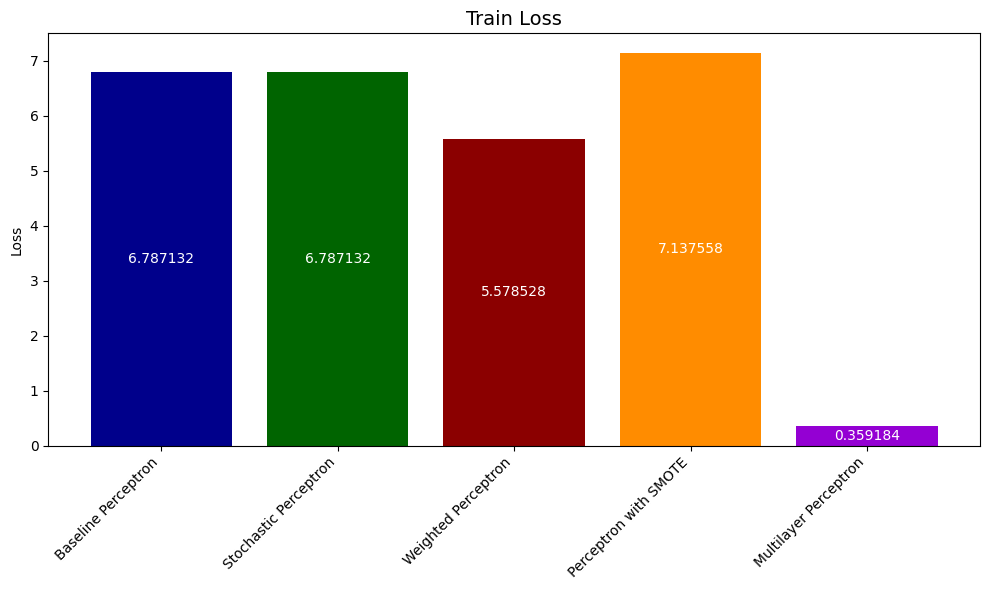

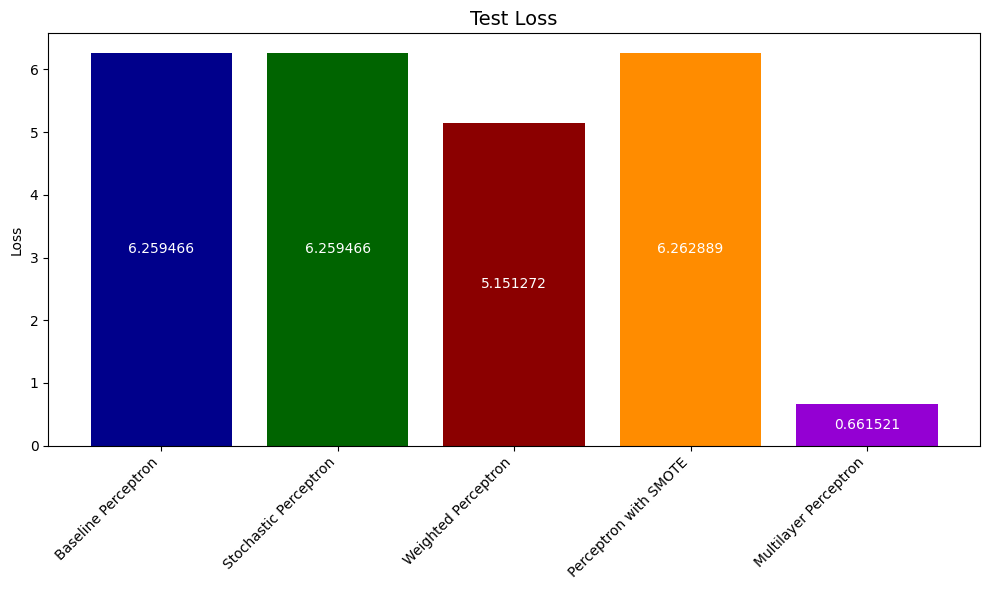

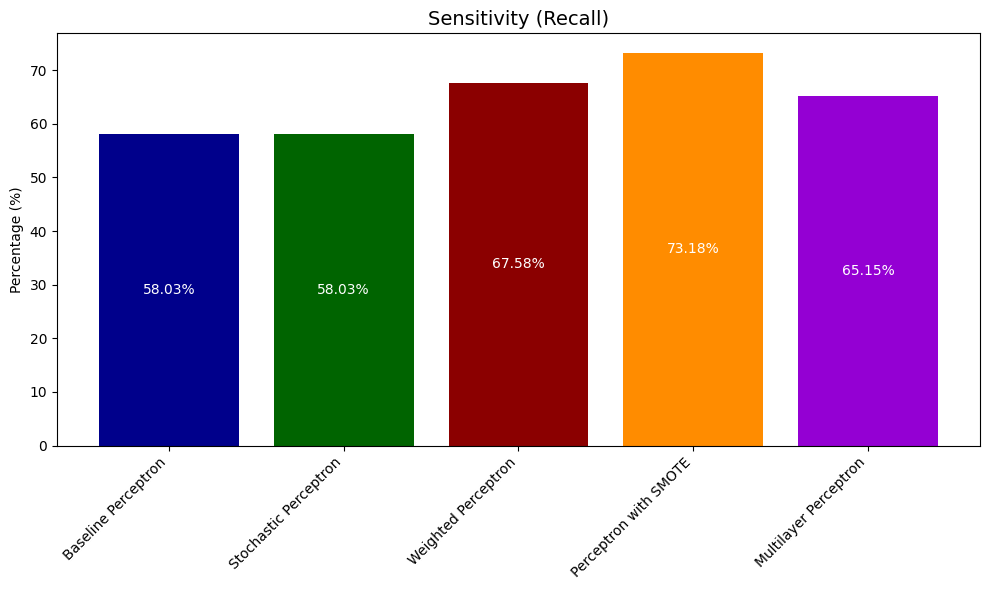

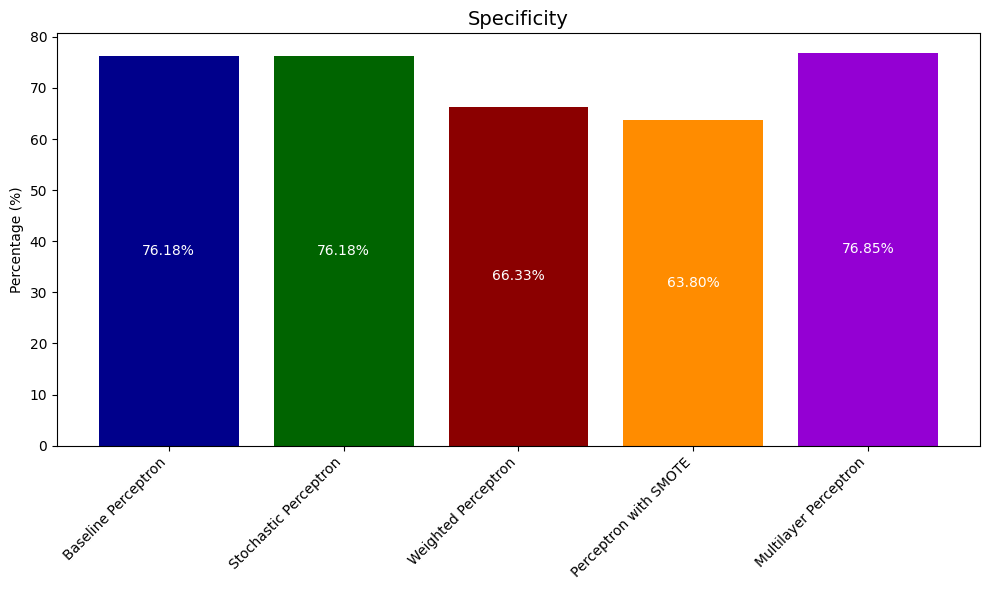

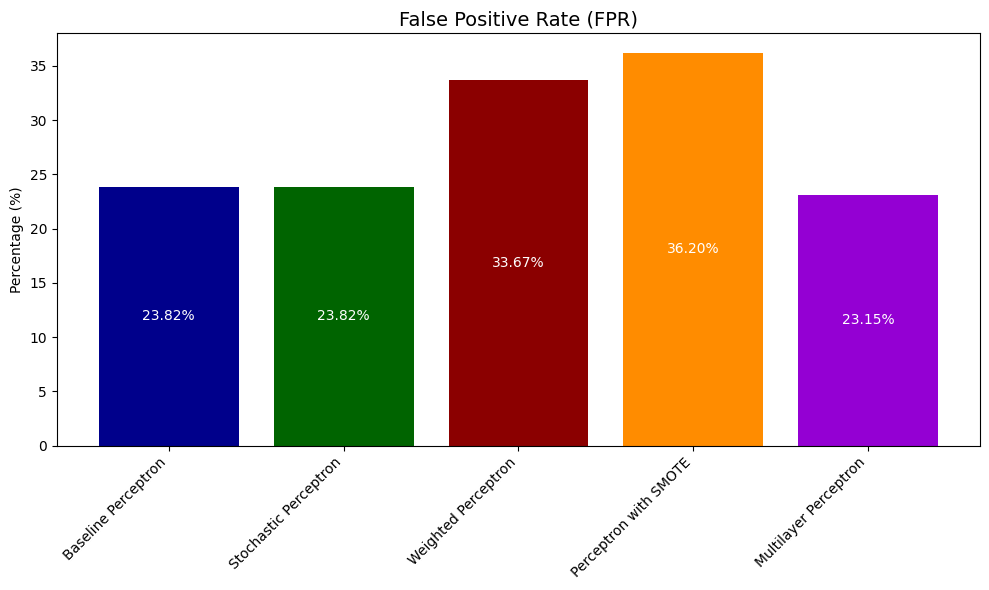

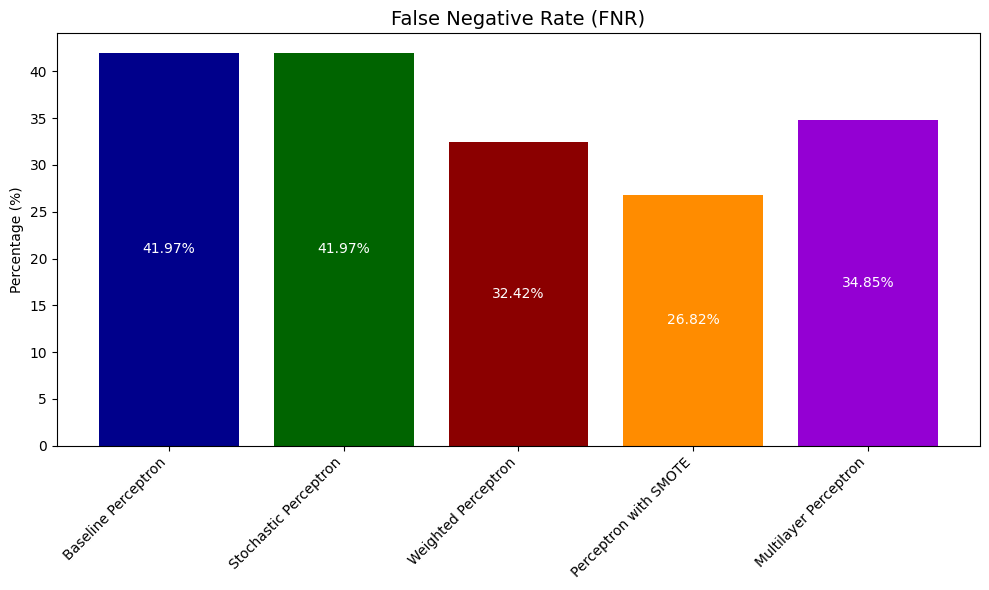

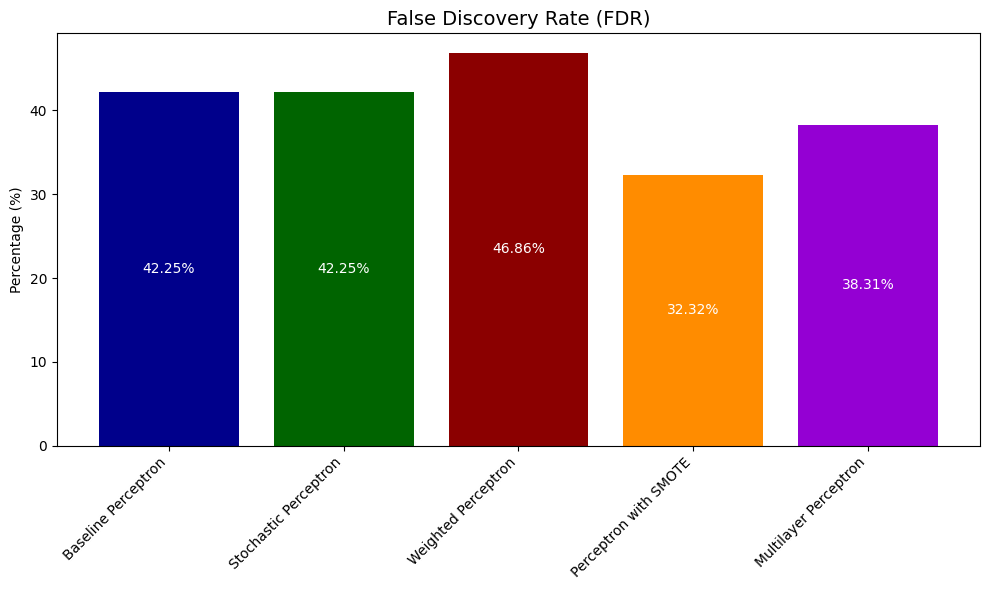

In [3]:
#Averages of all the parameters - Comparison Graphs
import matplotlib.pyplot as plt

# List of models to compare
models = [
    'Baseline Perceptron',
    'Stochastic Perceptron',
    'Weighted Perceptron',
    'Perceptron with SMOTE',
    'Multilayer Perceptron'
]

# Colors for the bars
colors = ['darkblue', 'darkgreen', 'darkred', 'darkorange', 'darkviolet']

# Performance metrics for each model
train_accuracy = [67.18, 67.18, 66.15, 67.65, 83.22]
test_accuracy = [69.70, 69.70, 66.77, 68.54, 72.67]
train_loss = [6.787131583, 6.787132, 5.578528, 7.137558, 0.359184]
test_loss = [6.259466417, 6.259466, 5.151272, 6.262889, 0.661521]
sensitivity = [58.03, 58.03, 67.58, 73.18, 65.15]
specificity = [76.18, 76.18, 66.33, 63.80, 76.85]
fpr = [23.82, 23.82, 33.67, 36.20, 23.15]
fnr = [41.97, 41.97, 32.42, 26.82, 34.85]
fdr = [42.25, 42.25, 46.86, 32.32, 38.31]

# Function to plot a bar graph for a given metric
def plot_metric_bar(data, title, y_label, is_percentage=False):
    plt.figure(figsize=(10, 6))
    bars = plt.bar(models, data, color=colors)

    # Title each bar with the data value
    for bar, value in zip(bars, data):
        x_pos = bar.get_x() + bar.get_width() / 2
        y_pos = bar.get_height() / 2
        label = f'{value:.2f}%' if is_percentage else f'{value:.6f}'
        plt.text(x_pos, y_pos, label, ha='center', va='center', fontsize=10, color='white')

    # Set plot title and labels
    plt.title(title, fontsize=14)
    plt.ylabel(y_label)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Plot all the metrics using the function
plot_metric_bar(train_accuracy, 'Train Accuracy', 'Accuracy (%)', is_percentage=True)
plot_metric_bar(test_accuracy, 'Test Accuracy', 'Accuracy (%)', is_percentage=True)
plot_metric_bar(train_loss, 'Train Loss', 'Loss')
plot_metric_bar(test_loss, 'Test Loss', 'Loss')
plot_metric_bar(sensitivity, 'Sensitivity (Recall)', 'Percentage (%)', is_percentage=True)
plot_metric_bar(specificity, 'Specificity', 'Percentage (%)', is_percentage=True)
plot_metric_bar(fpr, 'False Positive Rate (FPR)', 'Percentage (%)', is_percentage=True)
plot_metric_bar(fnr, 'False Negative Rate (FNR)', 'Percentage (%)', is_percentage=True)
plot_metric_bar(fdr, 'False Discovery Rate (FDR)', 'Percentage (%)', is_percentage=True)


#Sample Graphs for Report (Paper)

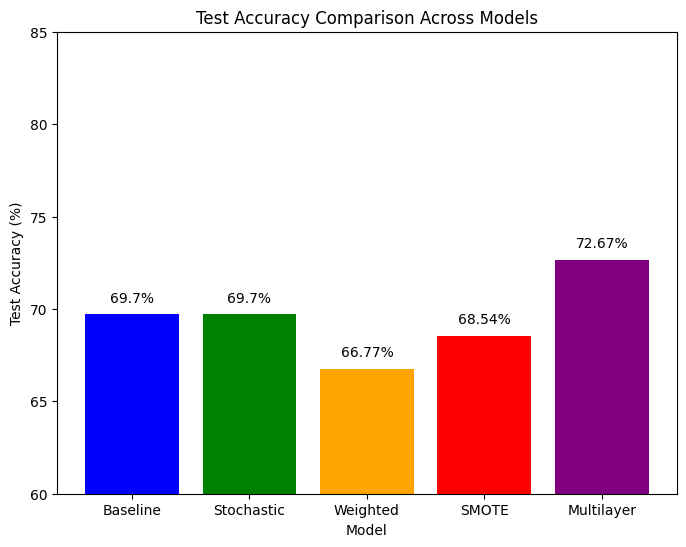

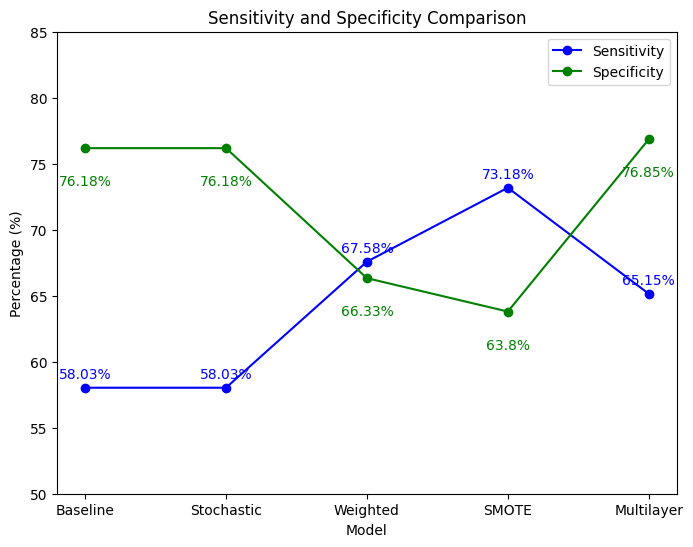

In [ ]:
import matplotlib.pyplot as plt

# Models and values from the table
models = ['Baseline', 'Stochastic', 'Weighted', 'SMOTE', 'Multilayer']
test_accuracy = [69.70, 69.70, 66.77, 68.54, 72.67]  # Updated Test Accuracy
sensitivity = [58.03, 58.03, 67.58, 73.18, 65.15]  # Updated Sensitivity (Recall)
specificity = [76.18, 76.18, 66.33, 63.80, 76.85]  # Updated Specificity

# Plot Test Accuracy Comparison
plt.figure(figsize=(8, 6))
plt.bar(models, test_accuracy, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.xlabel('Model')
plt.ylabel('Test Accuracy (%)')
plt.title('Test Accuracy Comparison Across Models')
plt.ylim(60, 85)  # Adjusted limits to fit within the range of values
for i, value in enumerate(test_accuracy):
    plt.text(i, value + 0.5, f"{value}%", ha='center', va='bottom')
plt.show()

# Plot Sensitivity and Specificity Comparison
plt.figure(figsize=(8, 6))
plt.plot(models, sensitivity, marker='o', label='Sensitivity', color='blue')
plt.plot(models, specificity, marker='o', label='Specificity', color='green')
plt.xlabel('Model')
plt.ylabel('Percentage (%)')
plt.title('Sensitivity and Specificity Comparison')
plt.legend()
plt.ylim(50, 85)
for i, value in enumerate(sensitivity):
    plt.text(i, value + 0.5, f"{value}%", ha='center', va='bottom', color='blue')
for i, value in enumerate(specificity):
    plt.text(i, value - 2, f"{value}%", ha='center', va='top', color='green')
plt.show()
